# Salaars original code

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# LOAD AND PREPROCESS ARCTIC ICE DATA 

# Load and concatenate all arctic ice files into one dataset
filepath = '../Data/Arctic_Ice_Monthly/N_*.csv'
all_files = glob.glob(filepath)
dataframe = []
for filename in all_files:
    df = pd.read_csv(filename)
    dataframe.append(df)
Combined_ArcticIce_Dataset = pd.concat(dataframe, ignore_index=True)

# Drop necessary columns from the dataset
Combined_ArcticIce_Dataset.drop([' mo','    data-type', ' region'], axis=1, inplace=True)

# Replace negatvie values in the dataset (null values) with column mean to not lose data
for col in Combined_ArcticIce_Dataset.columns:
    column_mean = Combined_ArcticIce_Dataset[Combined_ArcticIce_Dataset[col] >= 0][col].mean()
    Combined_ArcticIce_Dataset[col] = Combined_ArcticIce_Dataset[col].apply(lambda x: column_mean if x < 0 else x)
    
# Group duplicate year values (for each month) and extract annual averages for ice extent and area and update dataset
Avg_ArcticIce_Dataset = Combined_ArcticIce_Dataset.groupby('year')[[' extent', '   area']].mean().reset_index()
    
# Filter the data to the years covered by the methane data
Avg_ArcticIce_Filtered =  Avg_ArcticIce_Dataset[(Avg_ArcticIce_Dataset['year'] >= 1984) & (Avg_ArcticIce_Dataset['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered.rename(columns={'   area': 'area_avg', ' extent': 'extent_avg'})

# Drop unneccesary index column
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered[['year', 'extent_avg', 'area_avg']]

print(Avg_ArcticIce_Filtered)

    year  extent_avg   area_avg
0   1984   11.920000   9.012500
1   1985   12.015833   9.105833
2   1986   12.224167   9.294167
3   1987   12.094494   9.864752
4   1988   11.888661   9.850293
5   1989   11.986667   9.932500
6   1990   11.717500   9.668333
7   1991   11.770000   9.742500
8   1992   12.121667  10.099167
9   1993   11.946667   9.810000
10  1994   12.032500   9.989167
11  1995   11.438333   9.427500
12  1996   11.848333   9.799167
13  1997   11.691667   9.616667
14  1998   11.781667   9.626667
15  1999   11.713333   9.693333
16  2000   11.519167   9.457500
17  2001   11.622500   9.569167
18  2002   11.385000   9.356667
19  2003   11.419167   9.289167
20  2004   11.250833   9.367500
21  2005   10.927500   9.020833
22  2006   10.794167   8.802500
23  2007   10.498333   8.460000
24  2008   10.990000   9.235000
25  2009   10.955833   9.236667
26  2010   10.734167   8.980000
27  2011   10.505833   8.775833
28  2012   10.420000   8.661667
29  2013   10.919167   9.238333
30  2014

In [3]:
# LOAD AND PREPROCESS TEMPERATURE DATA 

# Load and process temperature dataset
Avg_Temp = pd.read_csv('../Data/Temps.csv')
Avg_Temp = Avg_Temp[['DATE', 'TAVG']]

#splits date into year and month columns
Avg_Temp[['year', 'mo']] = Avg_Temp['DATE'].str.split('-', expand=True)

Avg_Temp = Avg_Temp.drop('DATE', axis=1)

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
annual_averages = Avg_Temp.groupby('year')['TAVG'].mean().reset_index()
Avg_Temp = annual_averages

# fitlers the data to the years covered by the methane data
Avg_Temp['year'] = Avg_Temp['year'].astype('int')
Avg_Temp_Filtered =  Avg_Temp[(Avg_Temp['year'] >= 1984) & (Avg_Temp['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_Temp_Filtered = Avg_Temp_Filtered.rename(columns={'TAVG': 'temp_avg'})

# Drop uneccessary index column
Avg_Temp_Filtered = Avg_Temp_Filtered[['year', 'temp_avg']]

print(Avg_Temp_Filtered)

    year   temp_avg
0   1984 -13.700833
1   1985 -11.900833
2   1986 -11.574167
3   1987 -12.248333
4   1988 -13.194167
5   1989 -10.348333
6   1990 -12.250000
7   1991 -12.384167
8   1992 -12.428333
9   1993 -10.172500
10  1994 -12.655000
11  1995 -10.884167
12  1996 -10.777500
13  1997 -10.860000
14  1998  -8.371667
15  1999 -12.010000
16  2000 -11.788333
17  2001 -11.936667
18  2002 -10.220833
19  2003 -10.616667
20  2004 -10.765000
21  2005 -10.296667
22  2006 -10.370833
23  2007  -9.291667
24  2008 -10.391667
25  2009 -10.322500
26  2010  -9.817500
27  2011  -9.988333
28  2012 -10.519167
29  2013  -9.727500
30  2014  -9.430000
31  2015  -9.865833
32  2016  -7.227500
33  2017  -7.521667
34  2018  -8.312500
35  2019  -6.136667
36  2020  -9.605833
37  2021  -9.982500
38  2022  -8.940000
39  2023  -7.160909


In [4]:
# LOAD AND PREPROCESS METHANE DATA 

# Load and process methane dataset
Avg_CH4 = pd.read_csv('../Data/Methane.csv')
Avg_CH4 = Avg_CH4[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CH4_Avgs = Avg_CH4.groupby('year')['average'].mean().reset_index()
Avg_CH4 = Annual_CH4_Avgs

# Filter the data to the years covered by the methane data
Avg_CH4_Filtered =  Avg_CH4[(Avg_CH4['year'] >= 1984) & (Avg_CH4['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_CH4_Filtered = Avg_CH4_Filtered.rename(columns={'average': 'CH4_avg'})

# Drop unneccessary index column
Avg_CH4_Filtered = Avg_CH4_Filtered[['year', 'CH4_avg']]


print(Avg_CH4_Filtered)

    year      CH4_avg
0   1984  1645.013333
1   1985  1657.370833
2   1986  1670.210833
3   1987  1682.803333
4   1988  1693.389167
5   1989  1704.625833
6   1990  1714.531667
7   1991  1724.944167
8   1992  1735.460833
9   1993  1736.582500
10  1994  1742.157500
11  1995  1748.895833
12  1996  1751.313333
13  1997  1754.561667
14  1998  1765.655000
15  1999  1772.369167
16  2000  1773.203333
17  2001  1771.246667
18  2002  1772.705000
19  2003  1777.354167
20  2004  1777.020000
21  2005  1774.193333
22  2006  1774.986667
23  2007  1781.456667
24  2008  1787.094167
25  2009  1793.553333
26  2010  1798.972500
27  2011  1803.193333
28  2012  1808.188333
29  2013  1813.483333
30  2014  1822.666667
31  2015  1834.366667
32  2016  1843.179167
33  2017  1849.632500
34  2018  1857.444167
35  2019  1866.660833
36  2020  1879.096667
37  2021  1895.410000
38  2022  1911.967500
39  2023  1919.235000


In [5]:
# LOAD AND PREPROCESS CARBON DIOXIDE DATA 

# Load and process carbon dioxide dataset
Avg_CO2 = pd.read_csv('../Data/Carbon_Dioxide.csv')
Avg_CO2 = Avg_CO2[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CO2_Avgs = Avg_CO2.groupby('year')['average'].mean().reset_index() #changed
Avg_CO2 = Annual_CO2_Avgs

# Filter the data to the years covered by the methane data
Avg_CO2_Filtered =  Avg_CO2[(Avg_CO2['year'] >= 1984) & (Avg_CO2['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_CO2_Filtered = Avg_CO2_Filtered.rename(columns={'average' : 'CO2_avg'})

# Drop 
Avg_CO2_Filtered = Avg_CO2_Filtered[['year', 'CO2_avg']]

print(Avg_CO2_Filtered)

    year     CO2_avg
0   1984  344.073333
1   1985  345.537500
2   1986  346.968333
3   1987  348.684167
4   1988  351.159167
5   1989  352.787500
6   1990  354.055833
7   1991  355.393333
8   1992  356.092500
9   1993  356.833333
10  1994  358.330000
11  1995  360.171667
12  1996  361.932500
13  1997  363.042500
14  1998  365.696667
15  1999  367.794167
16  2000  368.965000
17  2001  370.573333
18  2002  372.583333
19  2003  375.140833
20  2004  376.952500
21  2005  378.980833
22  2006  381.149167
23  2007  382.900000
24  2008  385.020833
25  2009  386.497500
26  2010  388.756667
27  2011  390.632500
28  2012  392.650833
29  2013  395.397500
30  2014  397.345000
31  2015  399.648333
32  2016  403.066667
33  2017  405.219167
34  2018  407.610833
35  2019  410.072500
36  2020  412.443333
37  2021  414.703333
38  2022  417.072500
39  2023  418.983333


In [6]:
# Combine Temperature, CH4 and CO2 datasets with the Arctic Ice dataset
Processed_Dataset = pd.merge(Avg_ArcticIce_Filtered, Avg_Temp_Filtered[['year', 'temp_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CH4_Filtered[['year', 'CH4_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CO2_Filtered[['year', 'CO2_avg']], on='year', how='left')
print(Processed_Dataset)


    year  extent_avg   area_avg   temp_avg      CH4_avg     CO2_avg
0   1984   11.920000   9.012500 -13.700833  1645.013333  344.073333
1   1985   12.015833   9.105833 -11.900833  1657.370833  345.537500
2   1986   12.224167   9.294167 -11.574167  1670.210833  346.968333
3   1987   12.094494   9.864752 -12.248333  1682.803333  348.684167
4   1988   11.888661   9.850293 -13.194167  1693.389167  351.159167
5   1989   11.986667   9.932500 -10.348333  1704.625833  352.787500
6   1990   11.717500   9.668333 -12.250000  1714.531667  354.055833
7   1991   11.770000   9.742500 -12.384167  1724.944167  355.393333
8   1992   12.121667  10.099167 -12.428333  1735.460833  356.092500
9   1993   11.946667   9.810000 -10.172500  1736.582500  356.833333
10  1994   12.032500   9.989167 -12.655000  1742.157500  358.330000
11  1995   11.438333   9.427500 -10.884167  1748.895833  360.171667
12  1996   11.848333   9.799167 -10.777500  1751.313333  361.932500
13  1997   11.691667   9.616667 -10.860000  1754

In [7]:
# Replace outliers from the data with their column mean by computing interquartile range 
def replaceOutliers(df, col):

    # Get quartile 1 and 3
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1

    #  iterate through columns to see which data values are outliers
    index = 0
    count = 0
    for val in df[col]:
                  
                  if val < quartile1 - (1.5 * IQR) or val > quartile3 + (1.5 * IQR):
                          print("column: " + str(col))
                          year = df.iloc[index]['year']
                          print("year: " + str(year))
                          print("val: " + str(val))
                          count = count + 1
                  index += 1
                  
    print(count)
    df[col] = df[col].apply(lambda x: df[col].mean() if x < quartile1 - (1.5 * IQR) or x > quartile3 + (1.5 * IQR) else x)

# There was only a single outlier in the whole dataset and the MSE was negatively impacted by removing it
for col in Processed_Dataset:
        replaceOutliers(Processed_Dataset, col)

0
0
0
column: temp_avg
year: 2019.0
val: -6.136666666666667
1
0
0


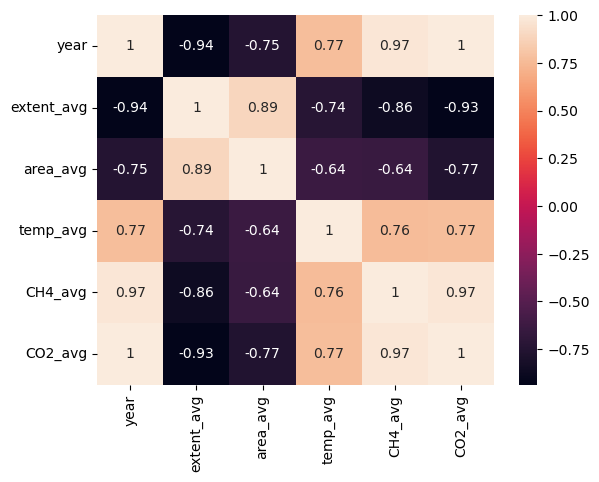

In [8]:
# Plot Correlation matrix for dataset
corr_matrix = Processed_Dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
# Create a linear regression model to predict arctic ice extent using all the features as input
def multivarlinearRegressionModel(df):
    
    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg', 'area_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X,Y)

    # Evaluate the model
    y_pred = lin_reg.predict(X)
    mse = mean_squared_error(Y, y_pred)
    print(mse)

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.scatter(df[col], y_pred, color='red', label='Predicted Ice Extent', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()
        
    # Plot results to show feature importance relationship with ice extent 
    feature_importance = lin_reg.coef_
    plt.figure()
    plt.bar(['Year', 'Temp', 'CH4', 'CO2', 'Area'], feature_importance)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance in Predicting Arctic Ice Extent')
    plt.show()

0.017237837029016812


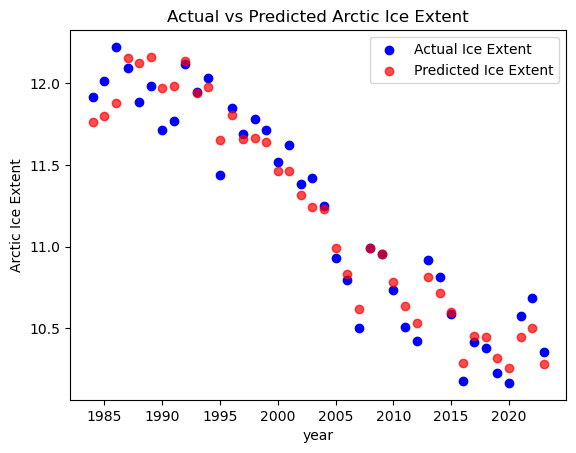

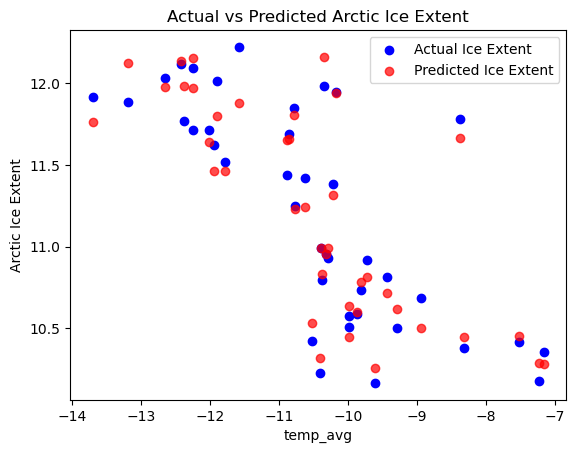

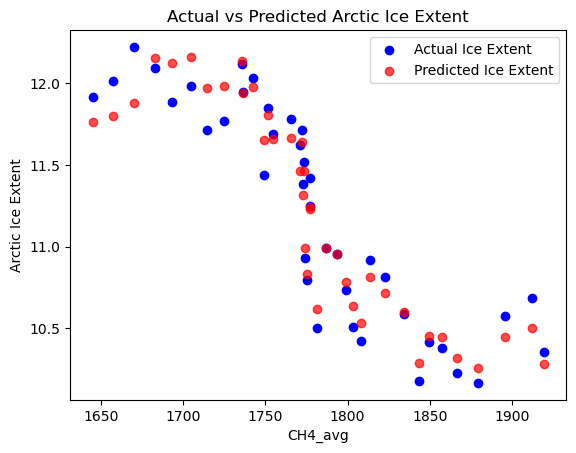

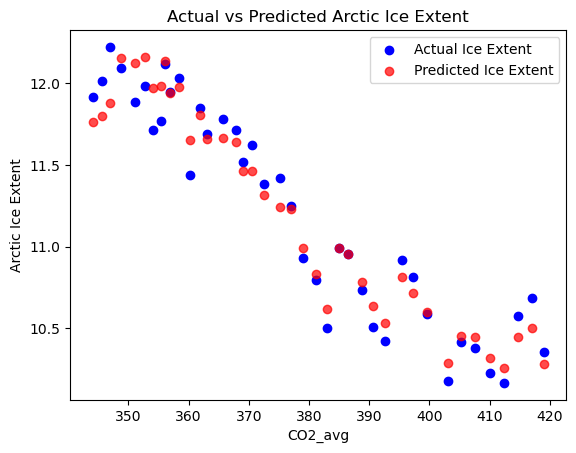

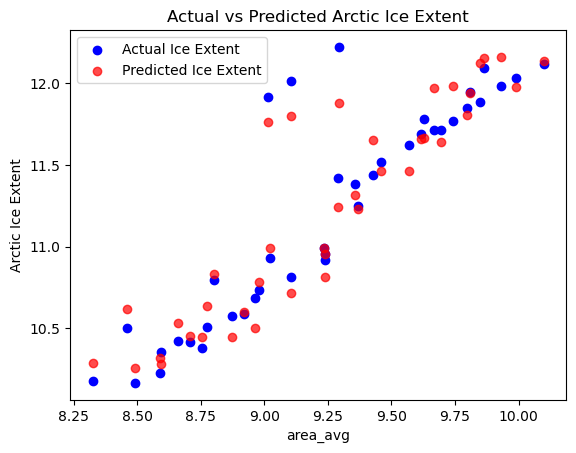

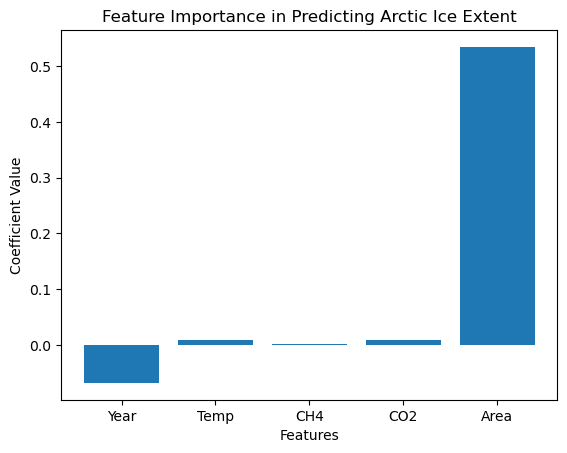

In [10]:
multivarlinearRegressionModel(Processed_Dataset)

In [11]:
Processed_Dataset

year  extent_avg   area_avg   temp_avg      CH4_avg     CO2_avg
0   1984   11.920000   9.012500 -13.700833  1645.013333  344.073333
1   1985   12.015833   9.105833 -11.900833  1657.370833  345.537500
2   1986   12.224167   9.294167 -11.574167  1670.210833  346.968333
3   1987   12.094494   9.864752 -12.248333  1682.803333  348.684167
4   1988   11.888661   9.850293 -13.194167  1693.389167  351.159167
5   1989   11.986667   9.932500 -10.348333  1704.625833  352.787500
6   1990   11.717500   9.668333 -12.250000  1714.531667  354.055833
7   1991   11.770000   9.742500 -12.384167  1724.944167  355.393333
8   1992   12.121667  10.099167 -12.428333  1735.460833  356.092500
9   1993   11.946667   9.810000 -10.172500  1736.582500  356.833333
10  1994   12.032500   9.989167 -12.655000  1742.157500  358.330000
11  1995   11.438333   9.427500 -10.884167  1748.895833  360.171667
12  1996   11.848333   9.799167 -10.777500  1751.313333  361.932500
13  1997   11.691667   9.616667 -10.860000  1754.561667  363.042500
14  1998   11.781667   9.626667  -8.371667  1765.655000  365.696667
15  1999   11.713333   9.693333 -12.010000  1772.369167  367.794167
16  2000   11.519167   9.457500 -11.788333  1773.203333  368.965000
17  2001   11.622500   9.569167 -11.936667  1771.246667  370.573333
18  2002   11.385000   9.356667 -10.220833  1772.705000  372.583333
19  2003   11.419167   9.289167 -10.616667  1777.354167  375.140833
20  2004   11.250833   9.367500 -10.765000  1777.020000  376.952500
21  2005   10.927500   9.020833 -10.296667  1774.193333  378.980833
22  2006   10.794167   8.802500 -10.370833  1774.986667  381.149167
23  2007   10.498333   8.460000  -9.291667  1781.456667  382.900000
24  2008   10.990000   9.235000 -10.391667  1787.094167  385.020833
25  2009   10.955833   9.236667 -10.322500  1793.553333  386.497500
26  2010   10.734167   8.980000  -9.817500  1798.972500  388.756667
27  2011   10.505833   8.775833  -9.988333  1803.193333  390.632500
28  2012   10.420000   8.661667 -10.519167  1808.188333  392.650833
29  2013   10.919167   9.238333  -9.727500  1813.483333  395.397500
30  2014   10.812500   9.105000  -9.430000  1822.666667  397.345000
31  2015   10.589167   8.920833  -9.865833  1834.366667  399.648333
32  2016   10.175833   8.325000  -7.227500  1843.179167  403.066667
33  2017   10.415000   8.706667  -7.521667  1849.632500  405.219167
34  2018   10.378333   8.755000  -8.312500  1857.444167  407.610833
35  2019   10.225000   8.590000 -10.399919  1866.660833  410.072500
36  2020   10.164167   8.489167  -9.605833  1879.096667  412.443333
37  2021   10.575000   8.870833  -9.982500  1895.410000  414.703333
38  2022   10.686667   8.963333  -8.940000  1911.967500  417.072500
39  2023   10.354545   8.591818  -7.160909  1919.235000  418.983333

year
feature MSE: 
0.05214246860577455


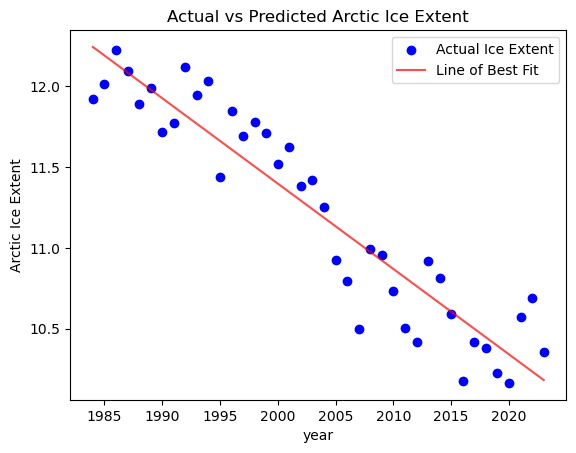

temp_avg
feature MSE: 
0.19434535367096417


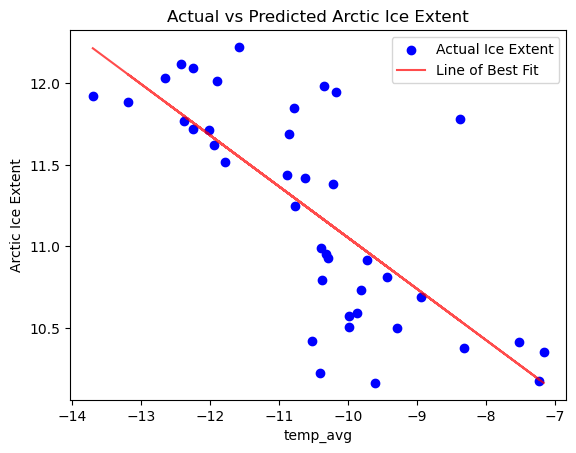

CH4_avg
feature MSE: 
0.10884200271788984


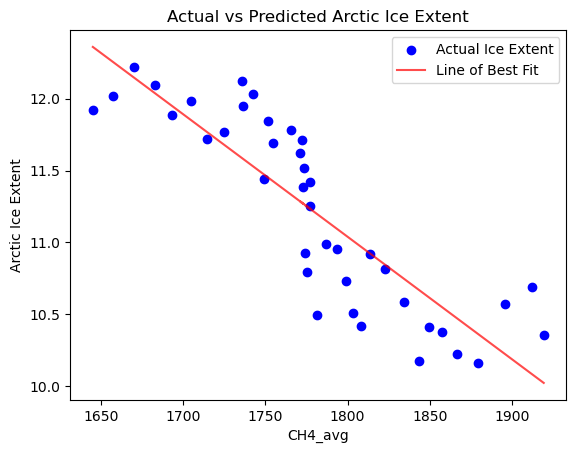

CO2_avg
feature MSE: 
0.0533982913369855


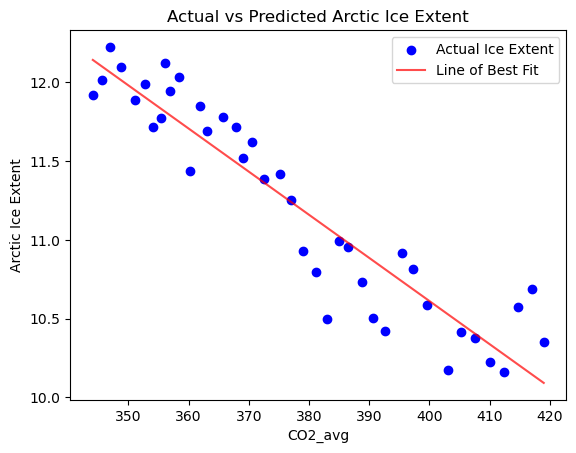

area_avg
feature MSE: 
0.08878969776937802


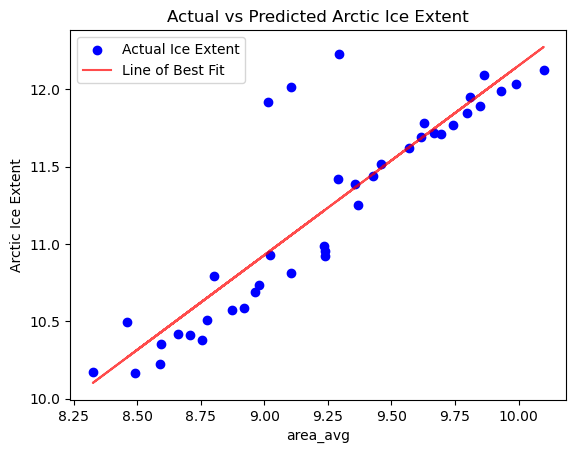

In [12]:
# Creating a linear regression model with each individual feature
def univarlinearRegressionModel(df):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg', 'area_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        print(col)
        target = X[col]
        target_reshaped = target.values.reshape(-1,1)

        # Create linear regression model and fit it to the training data
        lin_reg = LinearRegression()
        lin_reg.fit(target_reshaped,Y)

        # Evaluate the model
        y_pred = lin_reg.predict(target_reshaped)
        mse = mean_squared_error(Y, y_pred)
        print('feature MSE: ')
        print(mse)

        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.plot(df[col], y_pred, color='red', label='Line of Best Fit', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()

univarlinearRegressionModel(Processed_Dataset)

In [13]:
# Using a linear regression model with year as input to predict first arctic free year
def iceFreelinearRegressionModel(df):
    # Create a linear regression model to predict arctic ice extent using the year as input
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df['year']
    X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_reshaped,Y)

    # Get coefficient and y-intercept from the model
    slope = lin_reg.coef_[0]
    intercept = lin_reg.intercept_

    # Solving for the year when ice extent is zero using regression equation
    year_zero_ice = -intercept / slope
    
    # Round up to nearest year
    year_zero_ice = np.ceil(year_zero_ice)  

    print("First ice free year using year as input: ", int(year_zero_ice))


iceFreelinearRegressionModel(Processed_Dataset)

First ice free year using year as input:  2216


***

# Edited duplicate code

this is code copied from earlier in the document, edited to be able to make the new functions.

i copied it instead of editing the original since i didn't want to break anything.

In [14]:
# LOAD AND PREPROCESS ARCTIC ICE DATA 

# Load and concatenate all arctic ice files into one dataset
filepath = '../Data/Arctic_Ice_Monthly/N_*.csv'
all_files = glob.glob(filepath)
dataframe = []
for filename in all_files:
    df = pd.read_csv(filename)
    dataframe.append(df)
Combined_ArcticIce_Dataset = pd.concat(dataframe, ignore_index=True)

# Drop necessary columns from the dataset
Combined_ArcticIce_Dataset.drop(['    data-type', ' region'], axis=1, inplace=True)

# Replace negatvie values in the dataset (null values) with column mean to not lose data
for col in Combined_ArcticIce_Dataset.columns:
    column_mean = Combined_ArcticIce_Dataset[Combined_ArcticIce_Dataset[col] >= 0][col].mean()
    Combined_ArcticIce_Dataset[col] = Combined_ArcticIce_Dataset[col].apply(lambda x: column_mean if x < 0 else x)
    
# Group duplicate year values (for each month) and extract annual averages for ice extent and area and update dataset
Avg_ArcticIce_Dataset = Combined_ArcticIce_Dataset


# Filter the data to the years covered by the methane data
Avg_ArcticIce_Filtered =  Avg_ArcticIce_Dataset[(Avg_ArcticIce_Dataset['year'] >= 1984) & (Avg_ArcticIce_Dataset['year'] <= 2022)].reset_index()

# Rename columns to avoid confusion in the future
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered.rename(columns={' mo':'month', '   area': 'area_avg', ' extent': 'extent_avg'})

# Drop unneccesary index column
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered[['year','month', 'extent_avg', 'area_avg']]

In [15]:
# LOAD AND PREPROCESS TEMPERATURE DATA 

# Load and process temperature dataset
Avg_Temp = pd.read_csv('../Data/Temps.csv')
Avg_Temp = Avg_Temp[['DATE', 'TAVG']]

#splits date into year and month columns
Avg_Temp[['year', 'mo']] = Avg_Temp['DATE'].str.split('-', expand=True)

Avg_Temp = Avg_Temp.drop('DATE', axis=1)

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
annual_averages = Avg_Temp.groupby('year')['TAVG'].mean().reset_index()
Avg_Temp = annual_averages

# fitlers the data to the years covered by the methane data
Avg_Temp['year'] = Avg_Temp['year'].astype('int')
Avg_Temp_Filtered =  Avg_Temp[(Avg_Temp['year'] >= 1984) & (Avg_Temp['year'] <= 2022)].reset_index()

# Rename columns to avoid confusion in the future
Avg_Temp_Filtered = Avg_Temp_Filtered.rename(columns={'TAVG': 'temp_avg'})

# Drop uneccessary index column
Avg_Temp_Filtered = Avg_Temp_Filtered[['year', 'temp_avg']]

#print(Avg_Temp_Filtered)

In [16]:
# LOAD AND PREPROCESS METHANE DATA 

# Load and process methane dataset
Avg_CH4 = pd.read_csv('../Data/Methane.csv')
Avg_CH4 = Avg_CH4[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CH4_Avgs = Avg_CH4.groupby('year')['average'].mean().reset_index()
Avg_CH4 = Annual_CH4_Avgs

# Filter the data to the years covered by the methane data
Avg_CH4_Filtered =  Avg_CH4[(Avg_CH4['year'] >= 1984) & (Avg_CH4['year'] <= 2022)].reset_index()

# Rename columns to avoid confusion in the future
Avg_CH4_Filtered = Avg_CH4_Filtered.rename(columns={'average': 'CH4_avg'})

# Drop unneccessary index column
Avg_CH4_Filtered = Avg_CH4_Filtered[['year', 'CH4_avg']]


#print(Avg_CH4_Filtered)

In [17]:
# LOAD AND PREPROCESS CARBON DIOXIDE DATA 

# Load and process carbon dioxide dataset
Avg_CO2 = pd.read_csv('../Data/Carbon_Dioxide.csv')
Avg_CO2 = Avg_CO2[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CO2_Avgs = Avg_CO2.groupby('year')['average'].mean().reset_index()
Avg_CO2 = Annual_CO2_Avgs

# Filter the data to the years covered by the methane data
Avg_CO2_Filtered =  Avg_CO2[(Avg_CO2['year'] >= 1984) & (Avg_CO2['year'] <= 2022)].reset_index()

# Rename columns to avoid confusion in the future
Avg_CO2_Filtered = Avg_CO2_Filtered.rename(columns={'average' : 'CO2_avg'})

# Drop 
Avg_CO2_Filtered = Avg_CO2_Filtered[['year', 'CO2_avg']]

#print(Avg_CO2_Filtered)

In [18]:
# Combine Temperature, CH4 and CO2 datasets with the Arctic Ice dataset
Processed_Dataset = pd.merge(Avg_ArcticIce_Filtered, Avg_Temp_Filtered[['year', 'temp_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CH4_Filtered[['year', 'CH4_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CO2_Filtered[['year', 'CO2_avg']], on='year', how='left')
print(Processed_Dataset)


     year  month  extent_avg   area_avg   temp_avg      CH4_avg     CO2_avg
0    1984      1   14.470000  11.680000 -13.700833  1645.013333  344.073333
1    1985      1   14.720000  11.690000 -11.900833  1657.370833  345.537500
2    1986      1   14.890000  11.880000 -11.574167  1670.210833  346.968333
3    1987      1   14.970000  11.900000 -12.248333  1682.803333  348.684167
4    1988      1   11.343933   9.253513 -13.194167  1693.389167  351.159167
..    ...    ...         ...        ...        ...          ...         ...
463  2018     12   11.860000  10.450000  -8.312500  1857.444167  407.610833
464  2019     12   11.900000  10.520000  -6.136667  1866.660833  410.072500
465  2020     12   11.730000  10.160000  -9.605833  1879.096667  412.443333
466  2021     12   12.150000  10.740000  -9.982500  1895.410000  414.703333
467  2022     12   11.890000  10.270000  -8.940000  1911.967500  417.072500

[468 rows x 7 columns]


In [19]:
# Replace outliers from the data with their column mean by computing interquartile range 
def replaceOutliers(df, col):

    # Get quartile 1 and 3
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1

    #  iterate through columns to see which data values are outliers
    index = 0
    count = 0
    for val in df[col]:
                  
                  if val < quartile1 - (1.5 * IQR) or val > quartile3 + (1.5 * IQR):
                          print("column: " + str(col))
                          year, month = df.iloc[index]['year'], df.iloc[index]['month']
                          print("year: " + str(year))
                          print("month: " + str(month))
                          print("val: " + str(val))
                          count = count + 1
                  index += 1
                  
    print(count)
    df[col] = df[col].apply(lambda x: df[col].mean() if x < quartile1 - (1.5 * IQR) or x > quartile3 + (1.5 * IQR) else x)

# No outliers
for col in Processed_Dataset:
        replaceOutliers(Processed_Dataset, col)

0
0
0
0
column: temp_avg
year: 2019.0
month: 1.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 2.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 3.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 4.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 5.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 6.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 7.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 8.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 9.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 10.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 11.0
val: -6.136666666666667
column: temp_avg
year: 2019.0
month: 12.0
val: -6.136666666666667
12
0
0


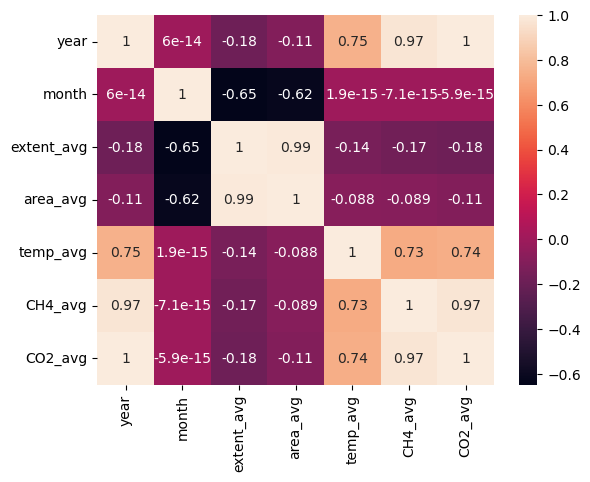

In [20]:
# Plot Correlation matrix for dataset
corr_matrix = Processed_Dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# functions used by other functions

month getter creates a dataframe containing data onyl from the input month

month to season returns a season from a number input, using a dict

month getter creates a dataframe containing data only one season

In [21]:
def month_getter(m):
    
    month_names = list(range(1,13)) # a list of names containing months
    month_data = [] #empty list to be populated by the for loop. Will contain 12 items, each is a dataframe with the data for that month. 
    
    for i in range(len(month_names)):
        
        loop_month = Processed_Dataset.loc[lambda df: df['month'] == month_names[i]] #creates temp df where month matches loop iteration
        month_data.append(loop_month) #appends the temporary df to a list, to used later to create 
        
        single_month_data = dict(zip(month_names, month_data));
    
    result = single_month_data[m].drop(["month"], axis=1)
    
    return result

In [22]:
def month_to_season(month):  
        
    season_dict = {1:'winter', 2:'winter', 3:'spring', 4:'spring', 5:'spring', 6:'summer',
                    7:'summer', 8:'summer', 9:'autumn', 10:'autumn', 11:'autumn', 12:'winter'}  
        
    season = season_dict[month]
        
    return season
    
    
season_list = []
    
    


In [23]:
def season_getter(season):
    
    seasonal_data = Processed_Dataset.loc[Processed_Dataset['season'] == season]
    
    seasonal_data = seasonal_data.drop(["season", "month"], axis=1)
    
    seasonal_data = seasonal_data.groupby(['year']).mean()
    
    result = seasonal_data.reset_index()
    
    return result

In [24]:
for i in range(len(Processed_Dataset['month'])):
        
    season_holder = month_to_season(Processed_Dataset['month'][i])
        
    season_list.append(season_holder)
    
Processed_Dataset['season'] = season_list

# Plot loop functions

These functions use for loops to generate plots for each item in  the list. seasonal plotters plot all seasons seperately, monthly plotters all the monthly data serpately.

In [25]:
def multivariate_seasonal_list_plotter():
    
    seasons_list = ['winter', 'summer', 'spring', 'autumn']
    count = 0
    
    for i in range(len(seasons_list)):
        
        print(seasons_list[i])
        print('MSE: ')
        
        getter_feeder = seasons_list[count]
        
        model_feeder = season_getter(getter_feeder)
                
        multivarlinearRegressionModel(model_feeder)
        
        count +=1
    

In [26]:
def univariate_seasonal_list_plotter():
    
    seasons_list = ['winter', 'summer', 'spring', 'autumn']
    count = 0
    
    for i in range(len(seasons_list)):
        
        print(seasons_list[i])
        print('MSE: ')
        
        getter_feeder = seasons_list[count]
        
        model_feeder = season_getter(getter_feeder)
                
        univarlinearRegressionModel(model_feeder)
        
        count +=1
    

In [27]:
def multivariate_monthly_list_plotter():
    
    months_list = list(range(1,13))
    count = 0
    
    for i in range(len(months_list)):
        
        print(months_list[i])
        
        getter_feeder = months_list[count]
        
        model_feeder = month_getter(getter_feeder)
                
        multivarlinearRegressionModel(model_feeder)
        
        count +=1
    

In [28]:
def univariate_monthly_list_plotter():
    
    months_list = list(range(1,13))
    count = 0
    
    for i in range(len(months_list)):
        
        print(months_list[i])
        
        getter_feeder = months_list[count]
        
        model_feeder = month_getter(getter_feeder)
                
        univarlinearRegressionModel(model_feeder)
        
        count +=1
    

winter
MSE: 
0.02512852914687097


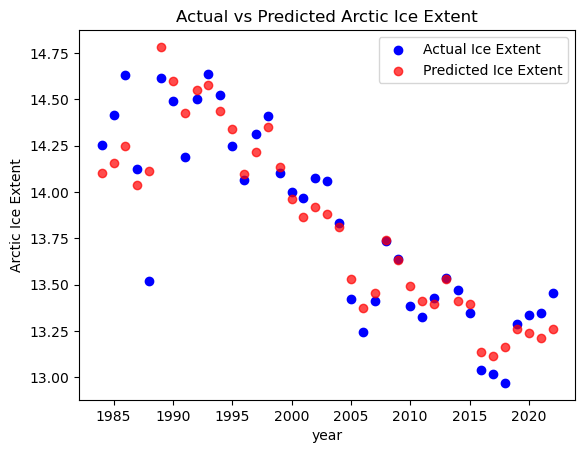

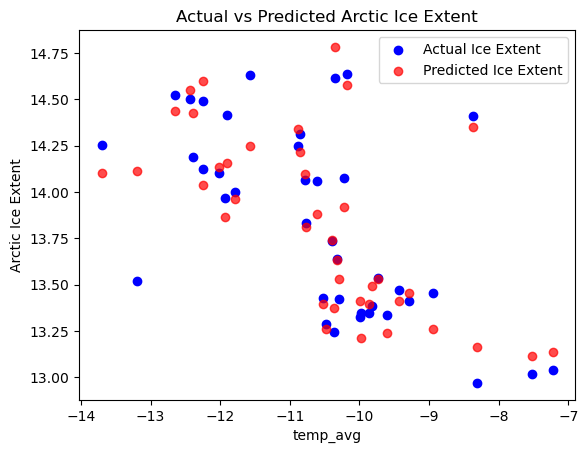

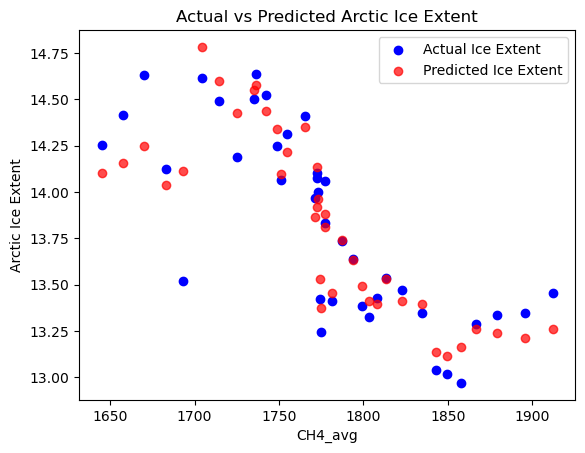

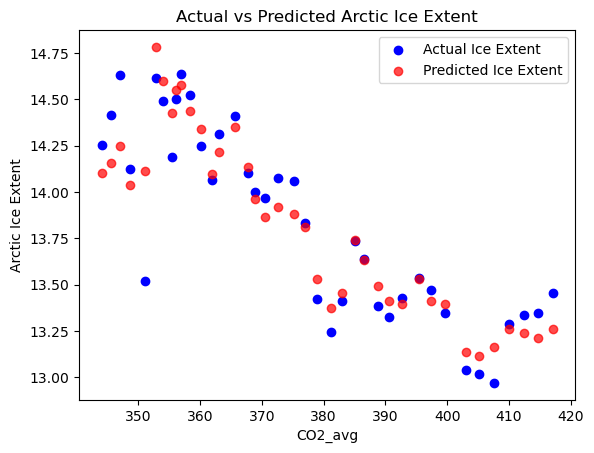

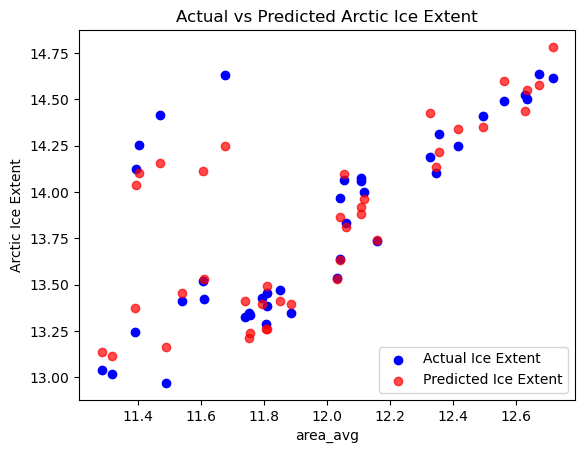

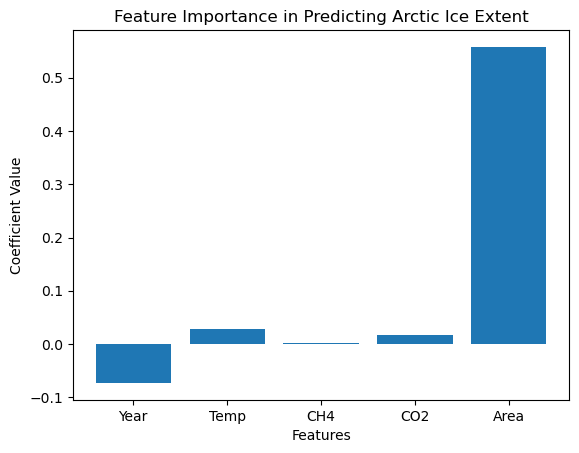

summer
MSE: 
0.032051908836329905


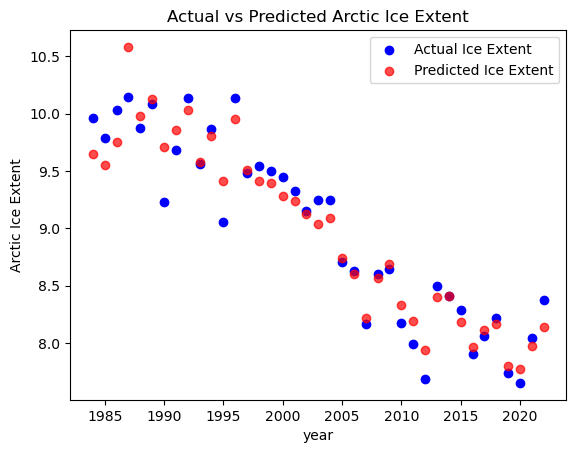

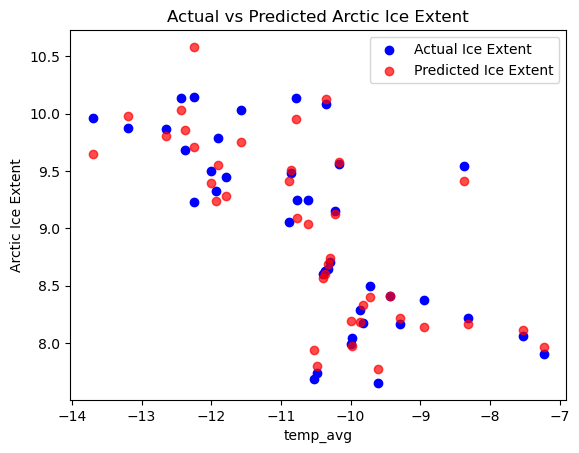

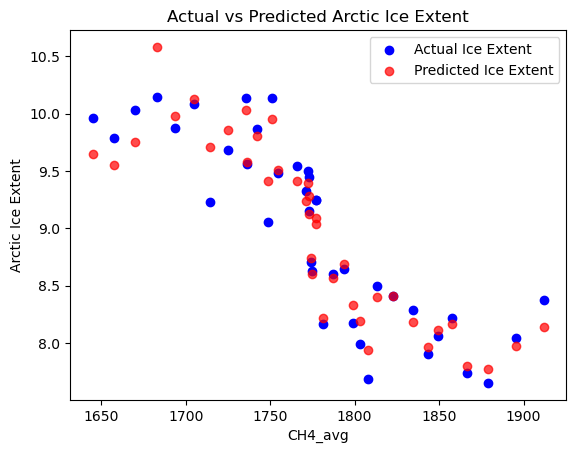

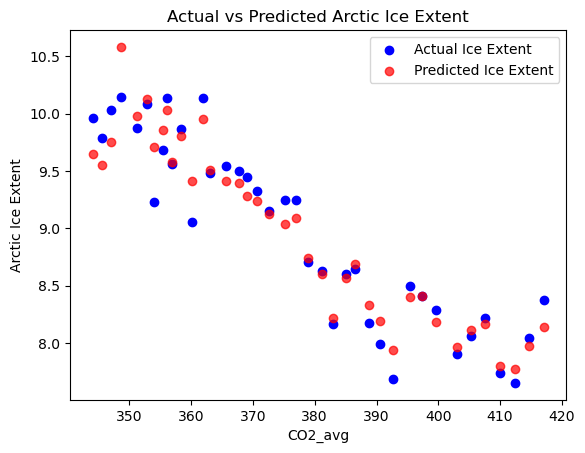

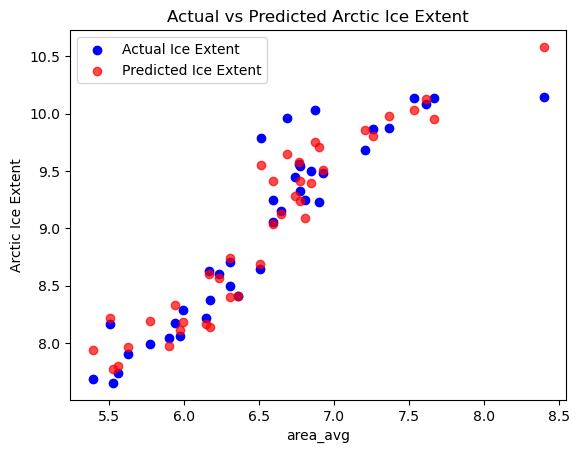

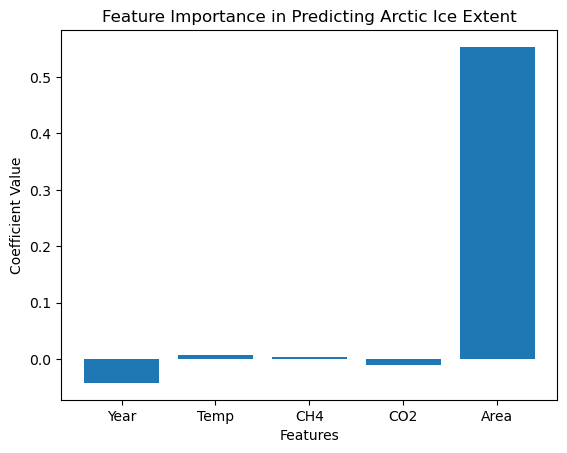

spring
MSE: 
0.02571075510180618


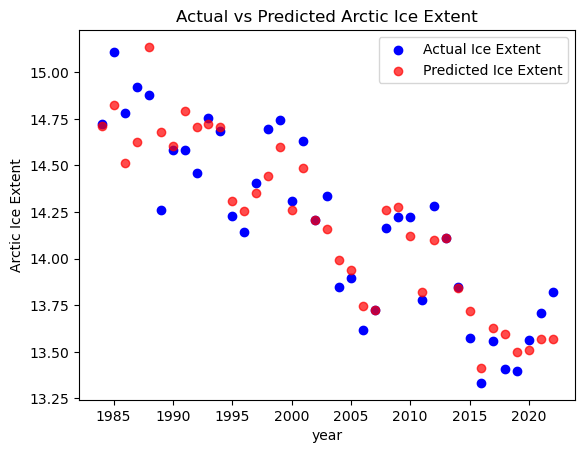

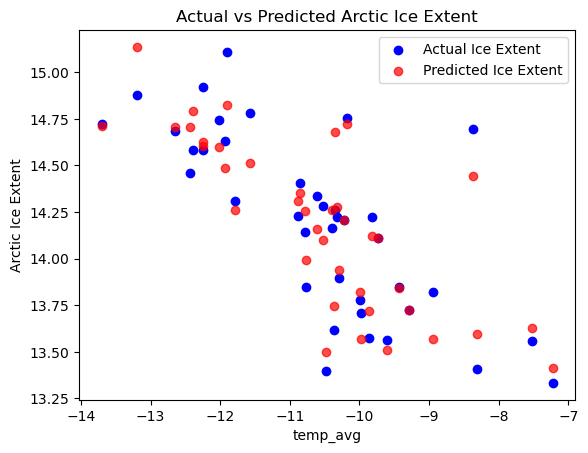

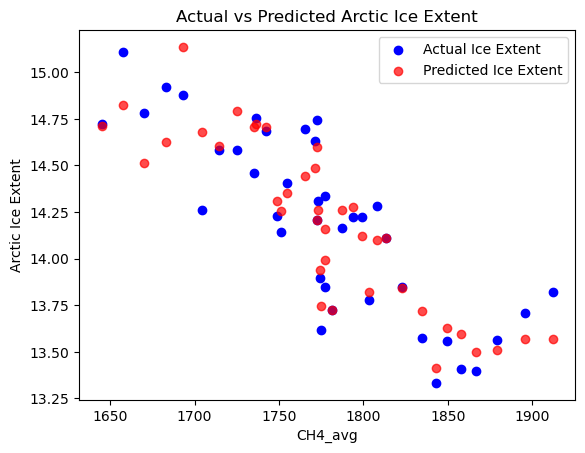

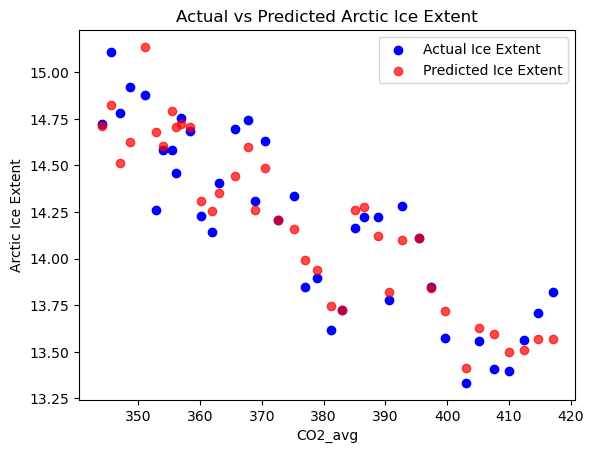

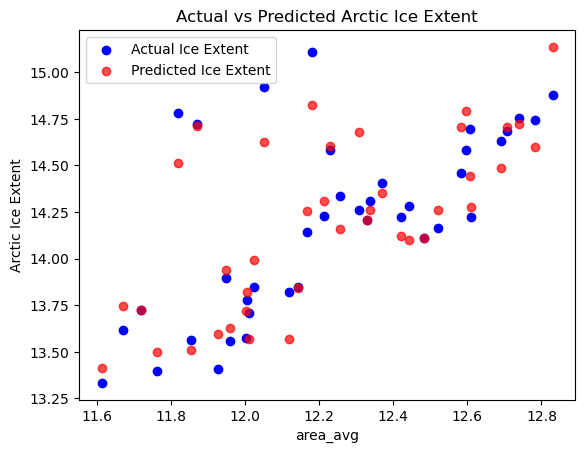

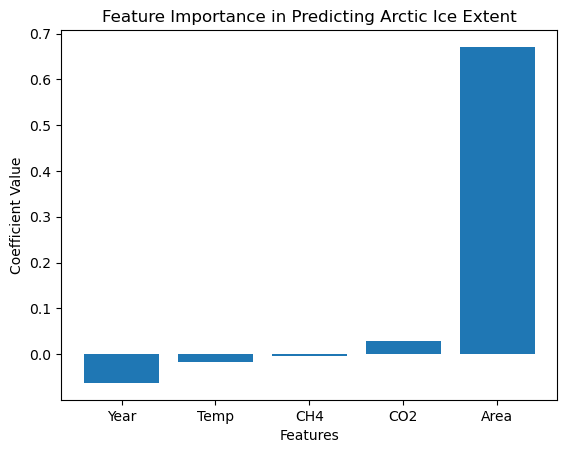

autumn
MSE: 
0.030156805337916228


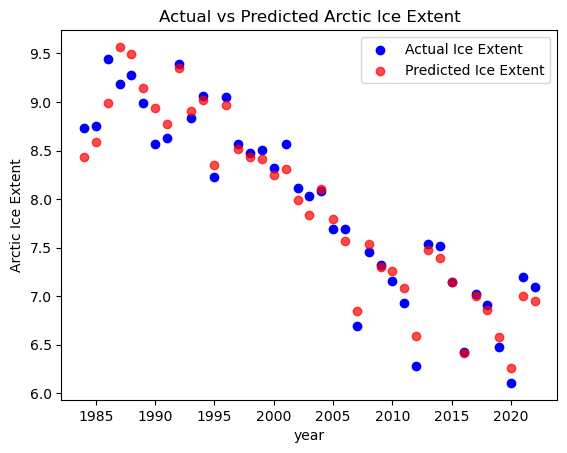

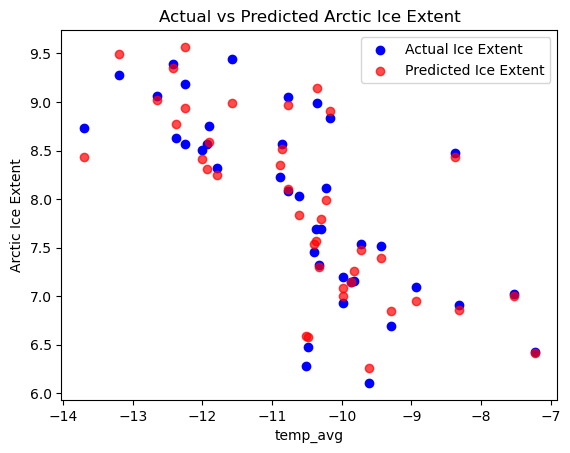

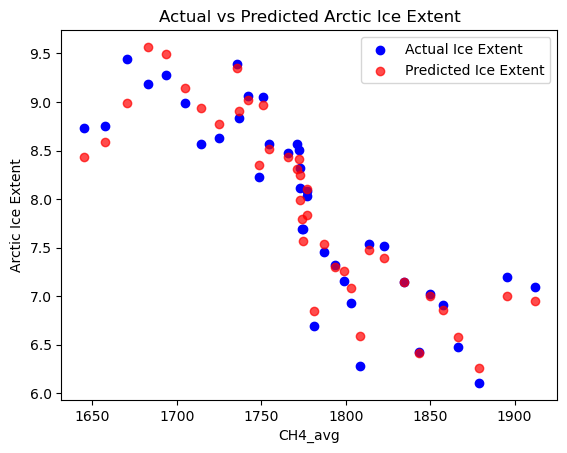

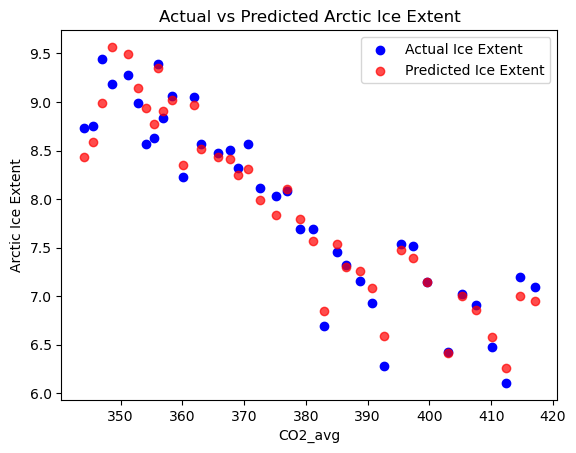

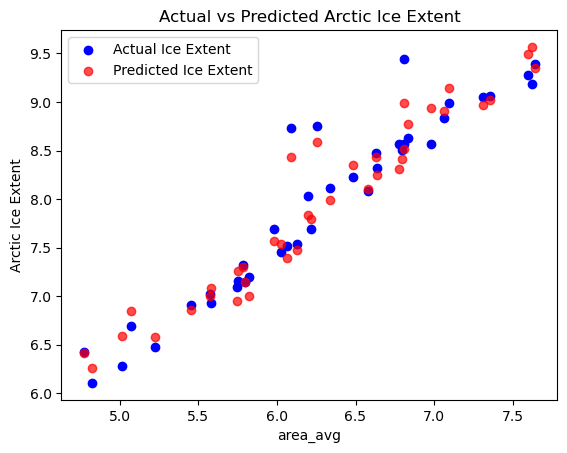

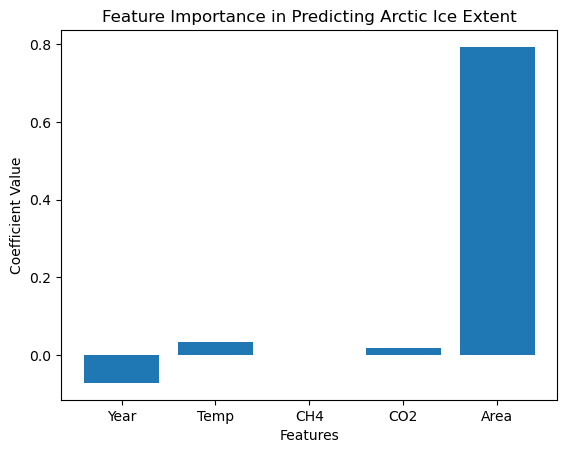

In [29]:
multivariate_seasonal_list_plotter()

1
0.05199307576629364


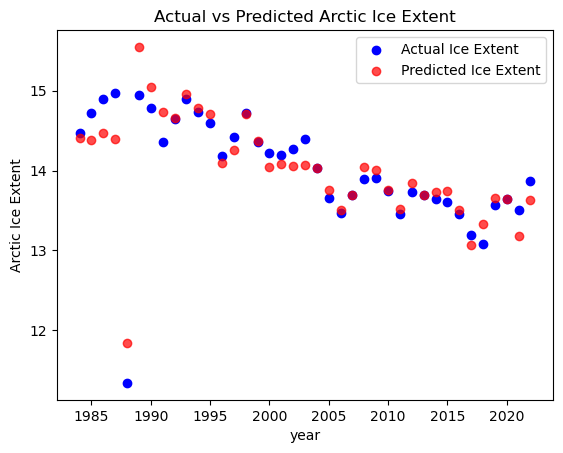

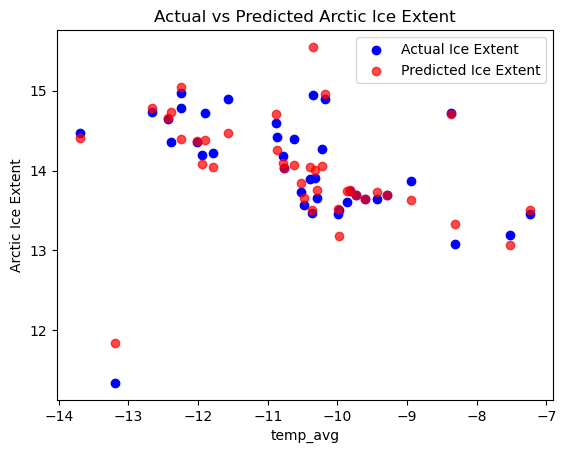

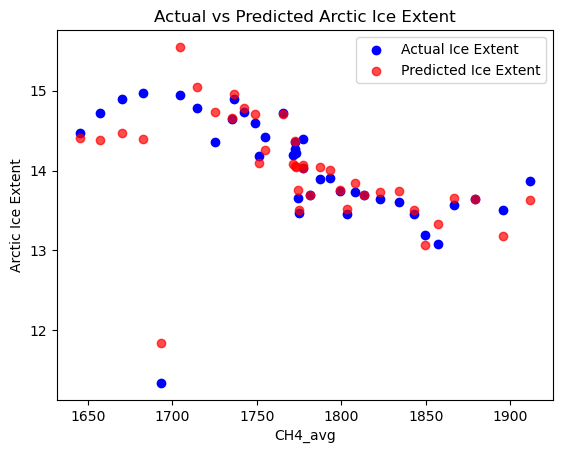

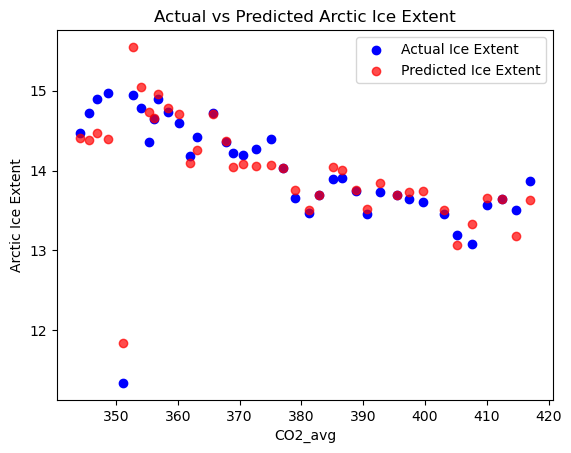

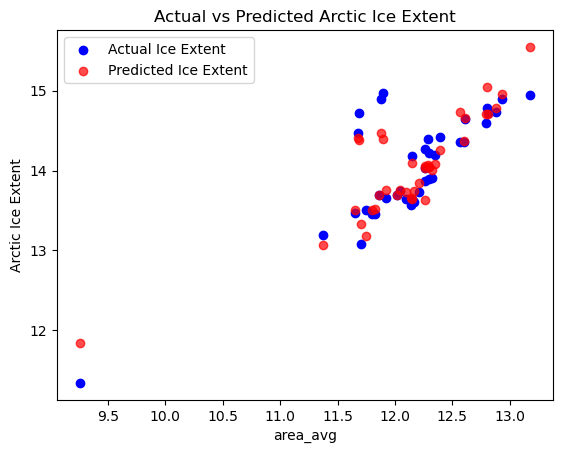

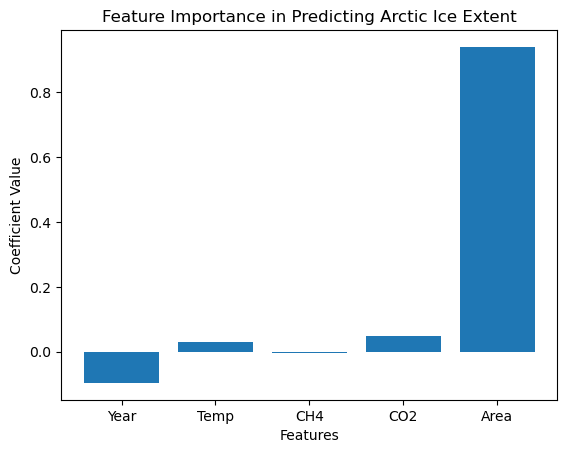

2
0.02612511569587606


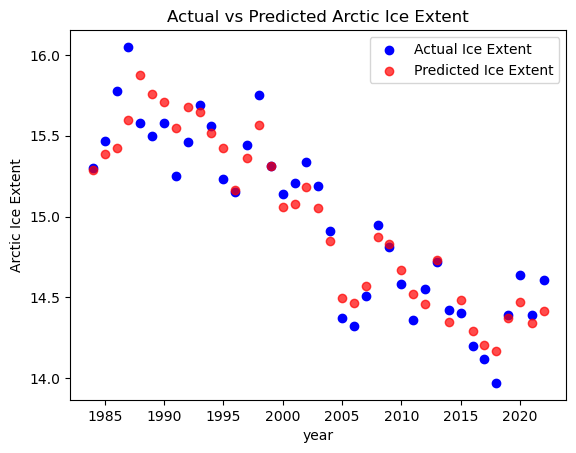

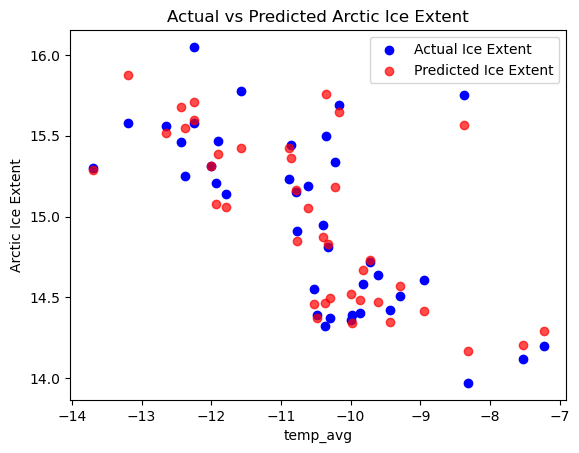

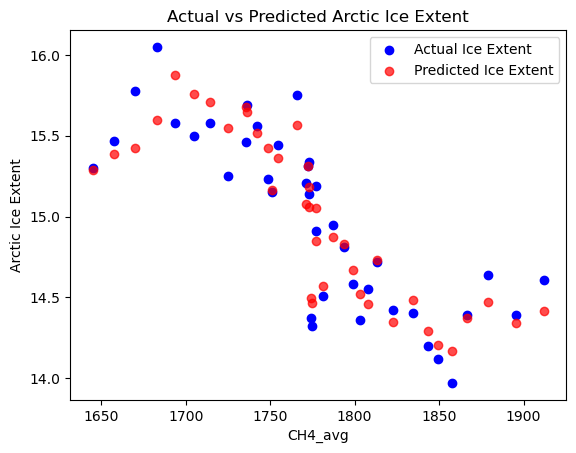

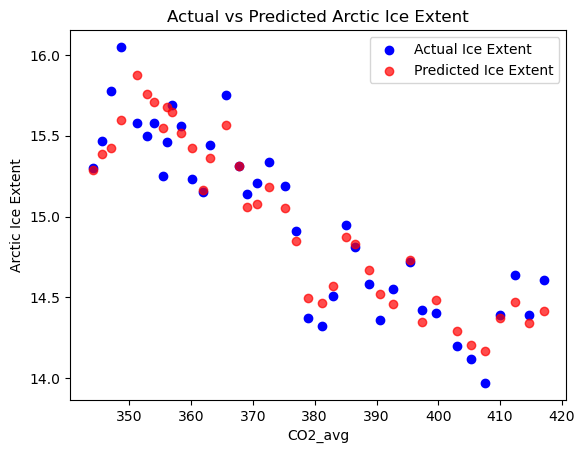

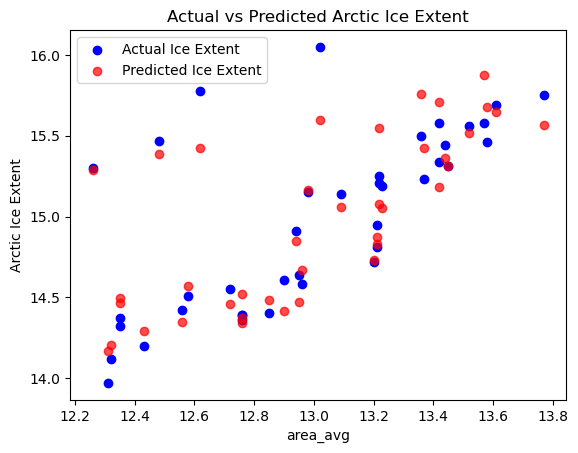

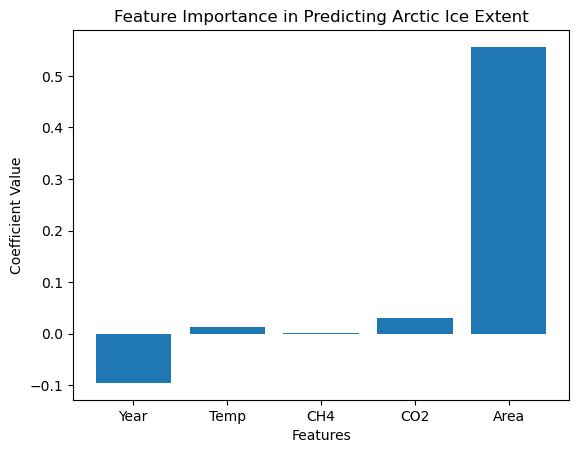

3
0.024896287297304802


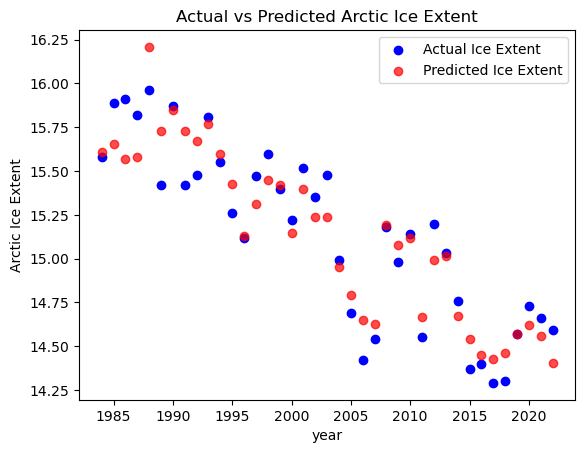

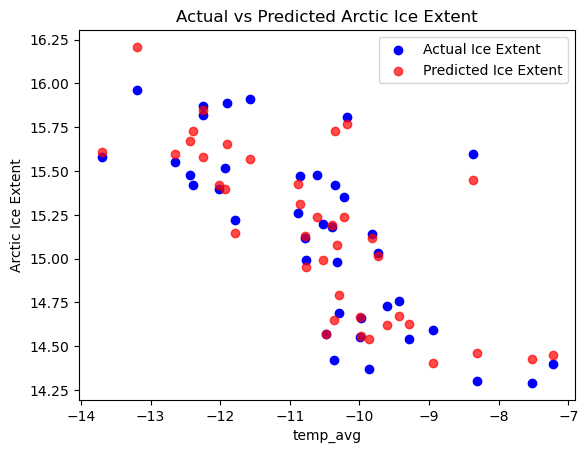

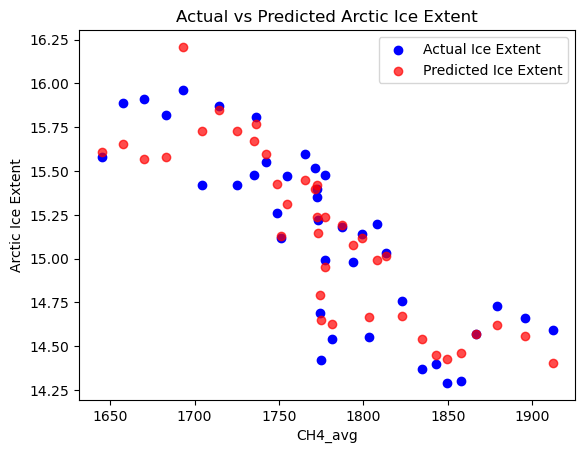

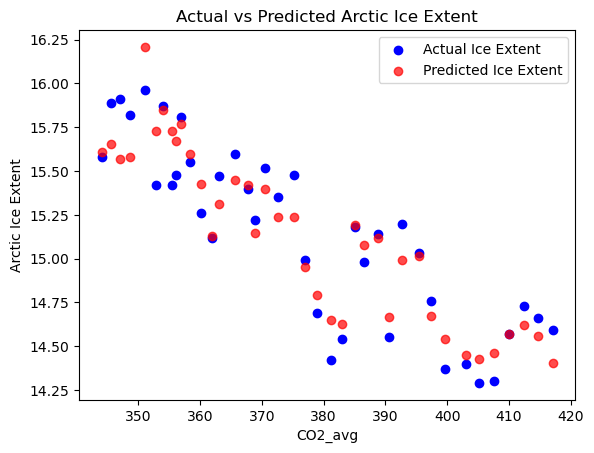

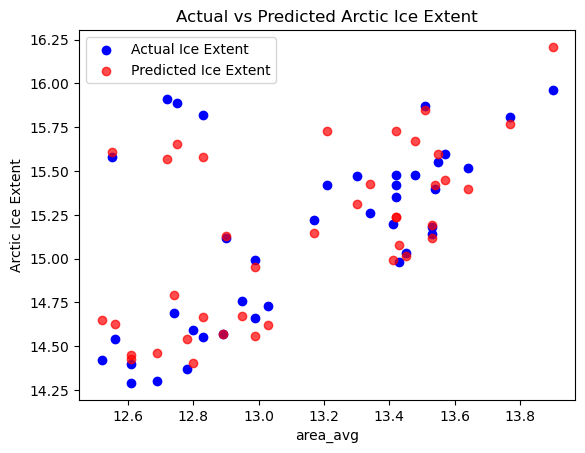

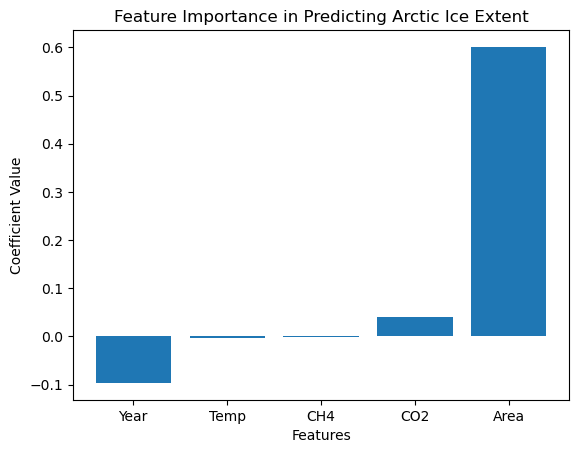

4
0.027583917395409226


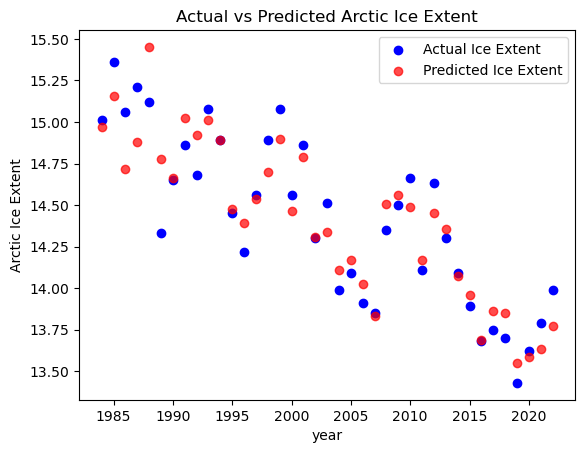

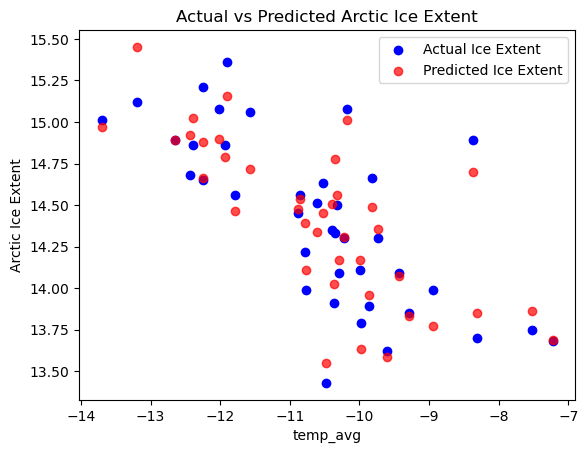

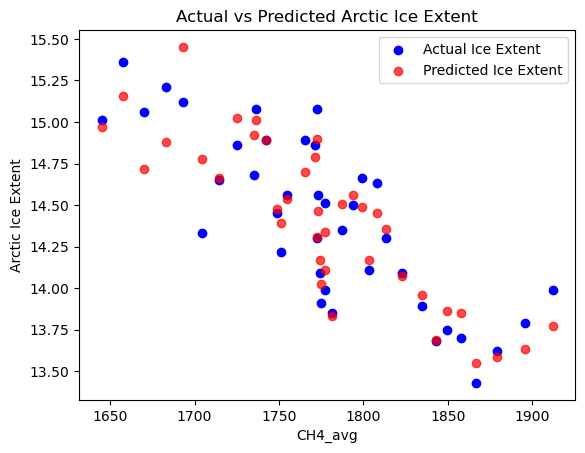

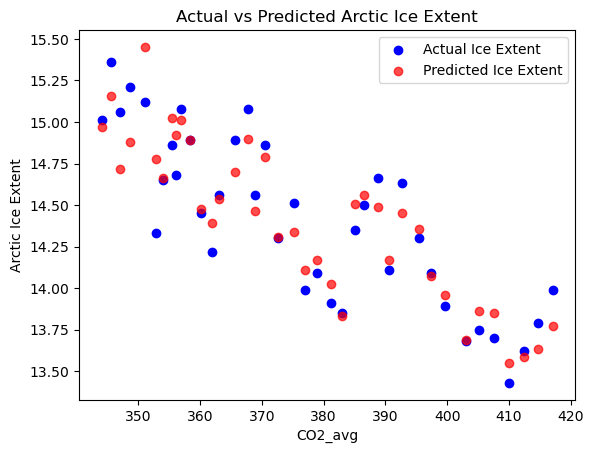

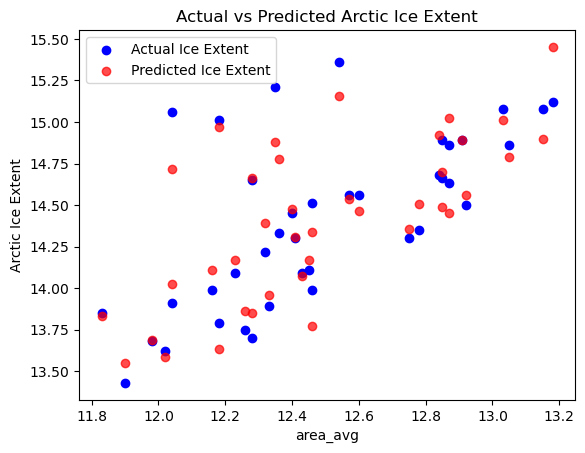

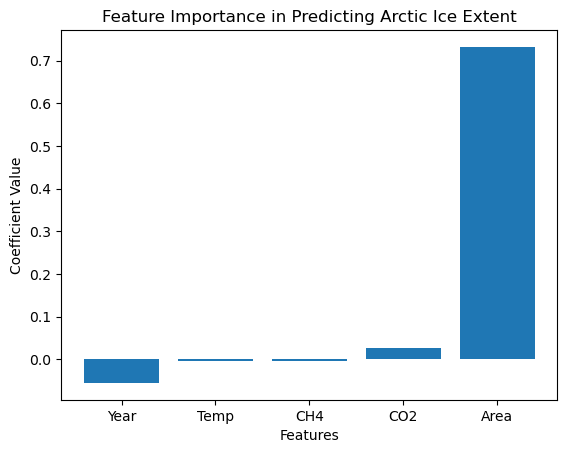

5
0.037416389816578036


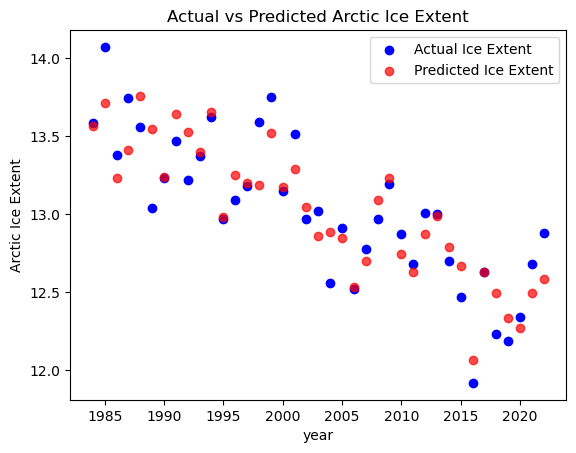

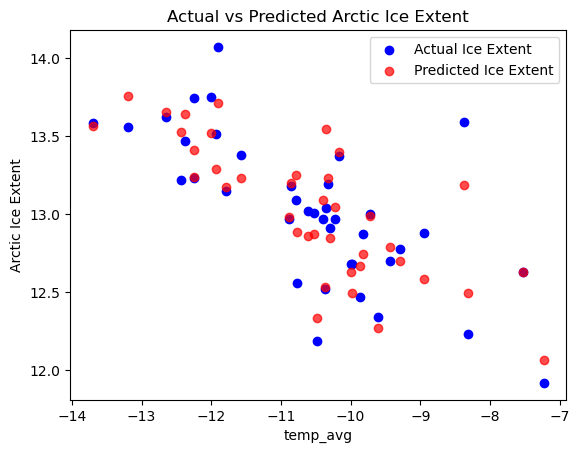

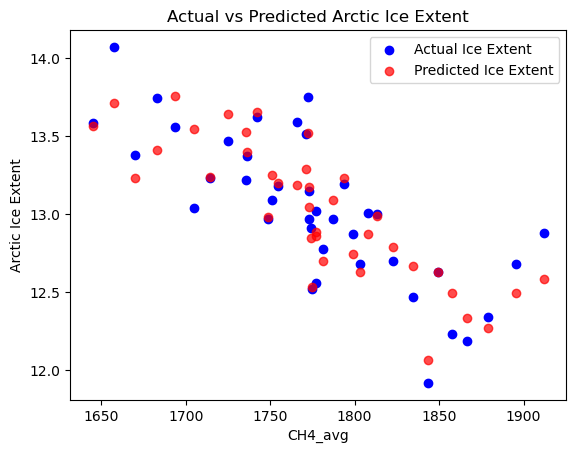

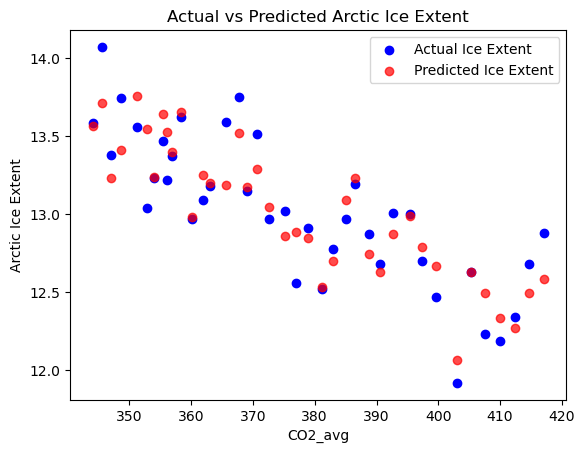

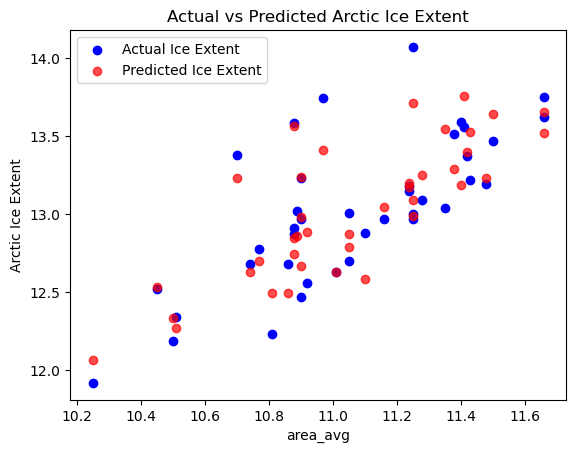

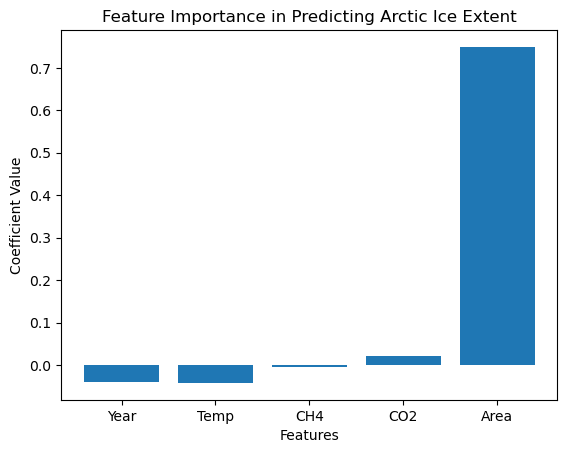

6
0.024859407015957694


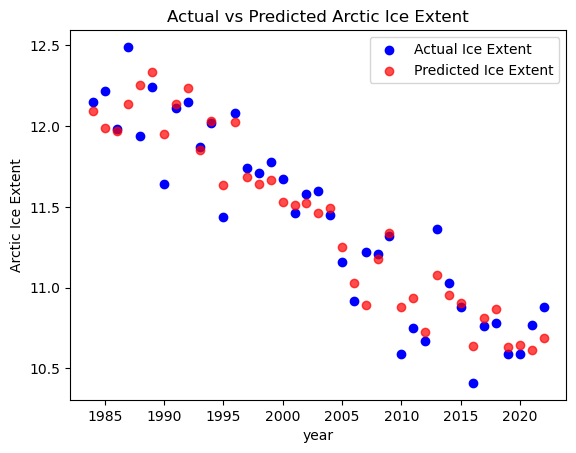

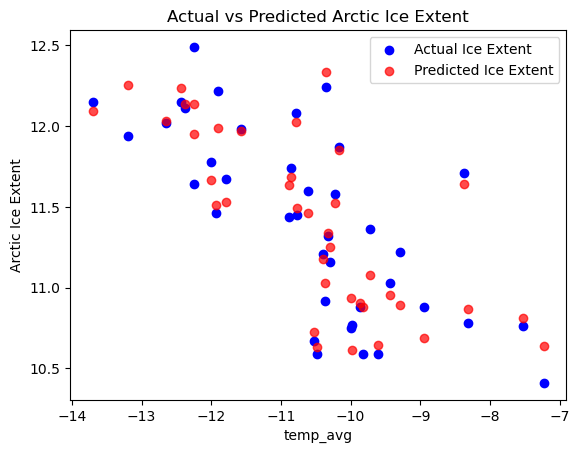

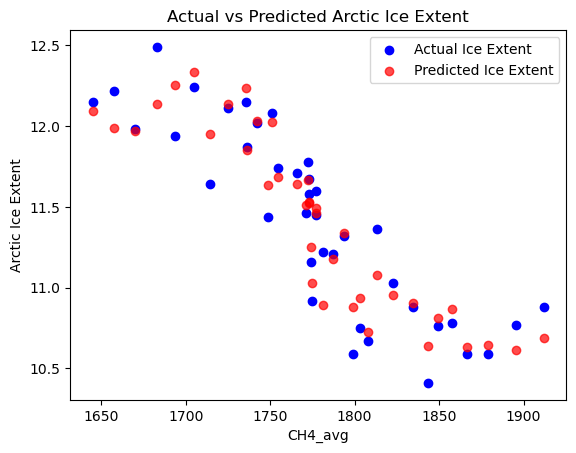

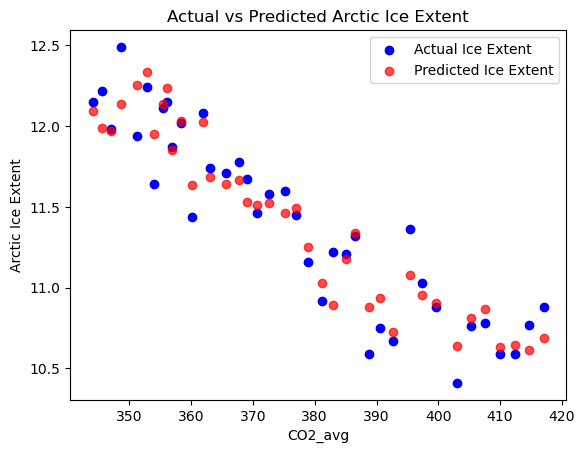

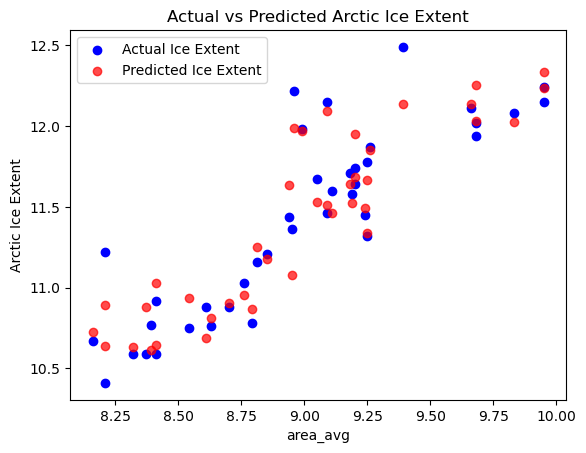

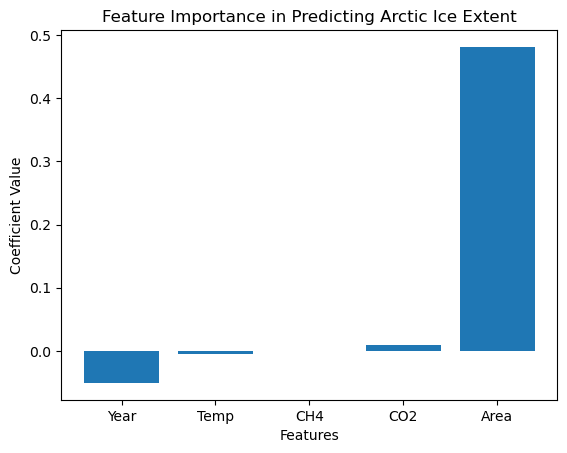

7
0.04547654182223804


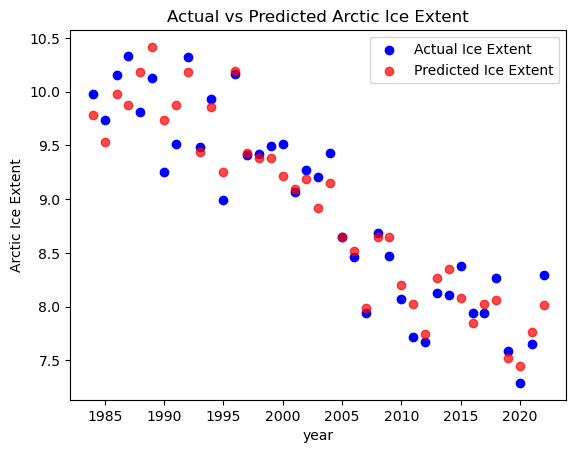

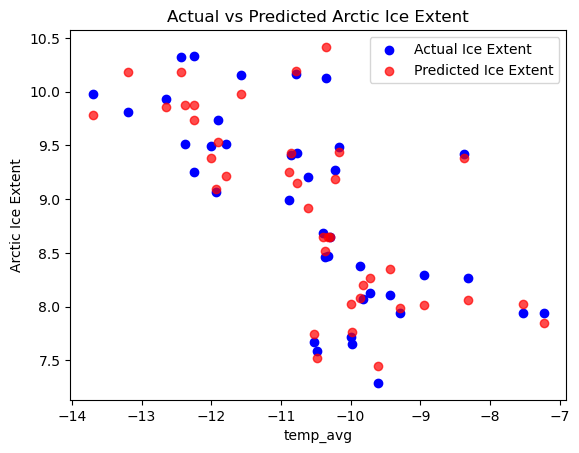

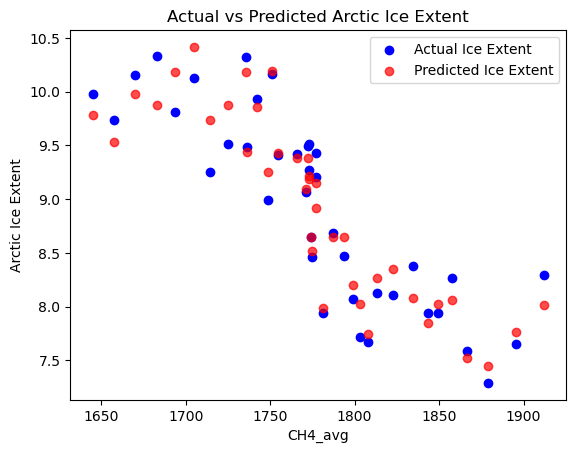

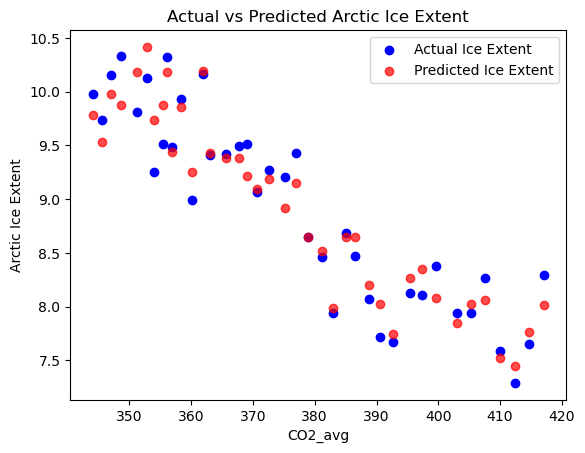

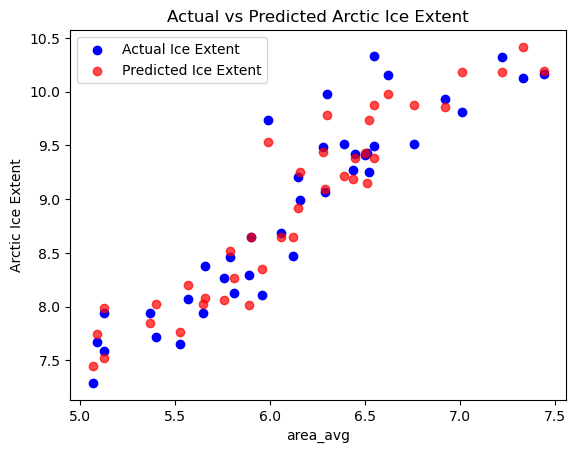

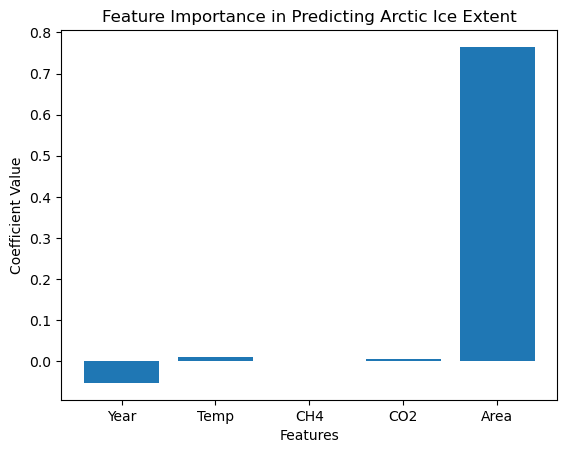

8
0.12536934846121298


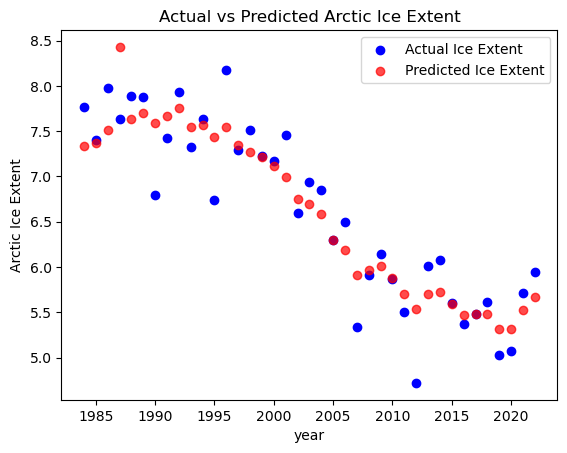

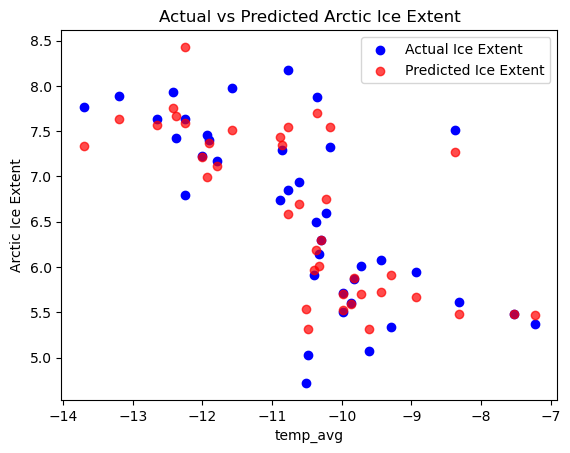

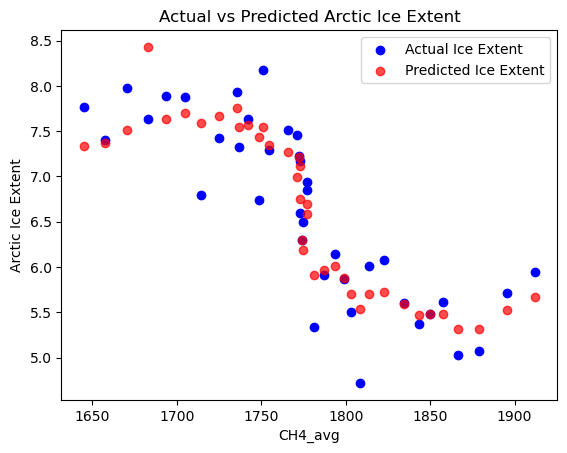

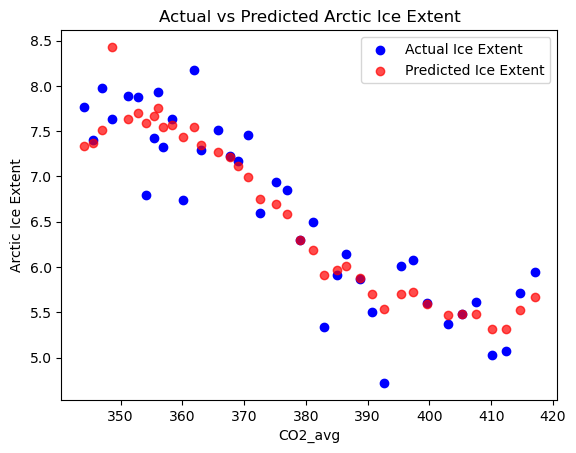

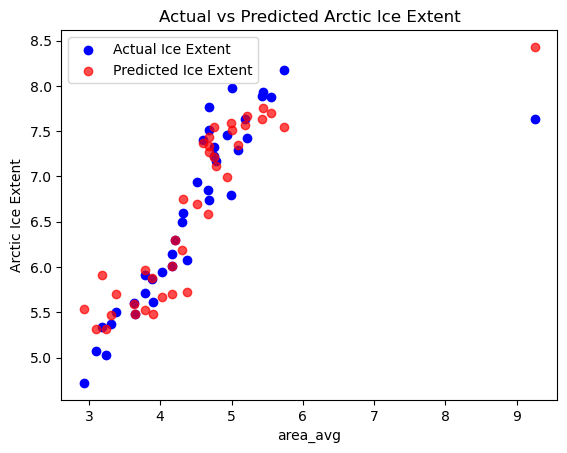

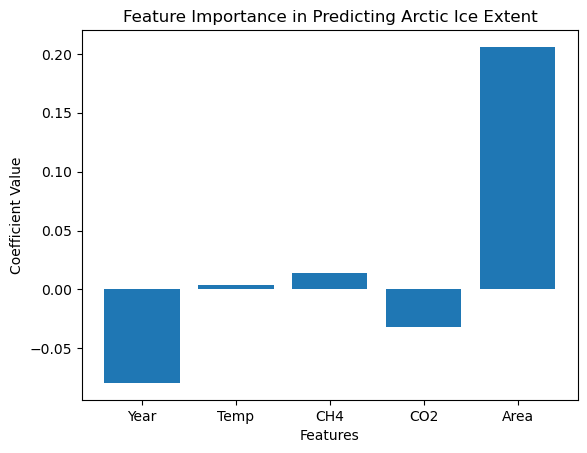

9
0.05208181432211509


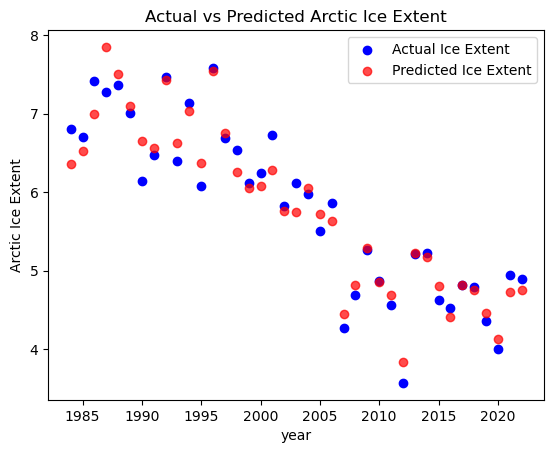

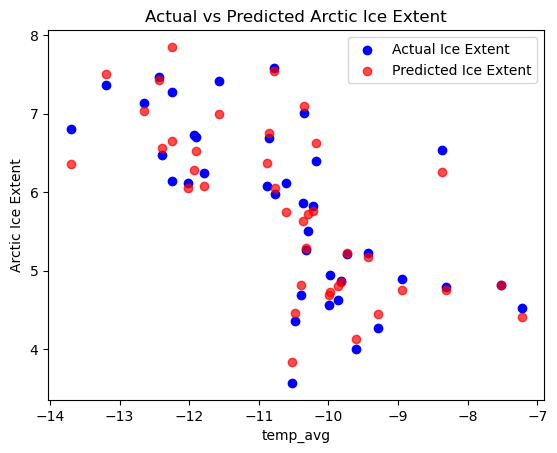

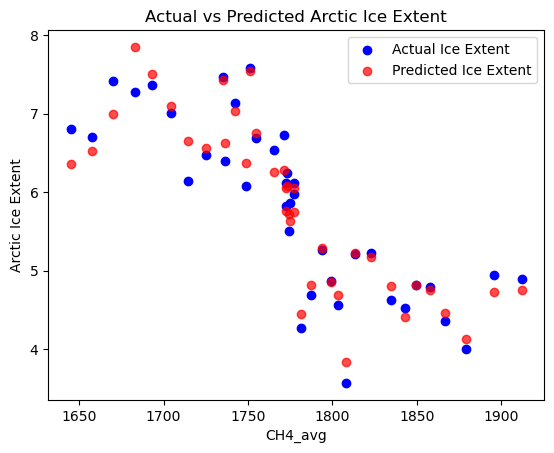

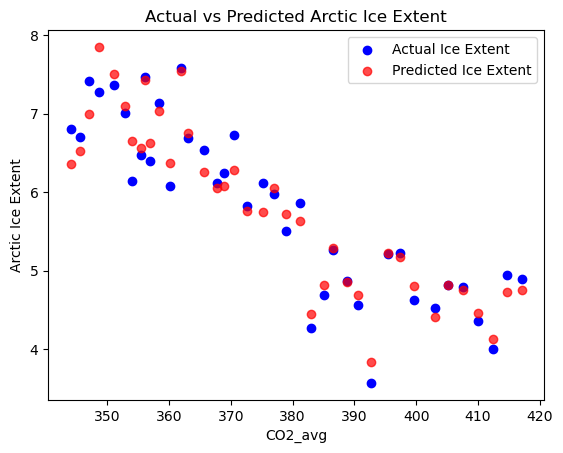

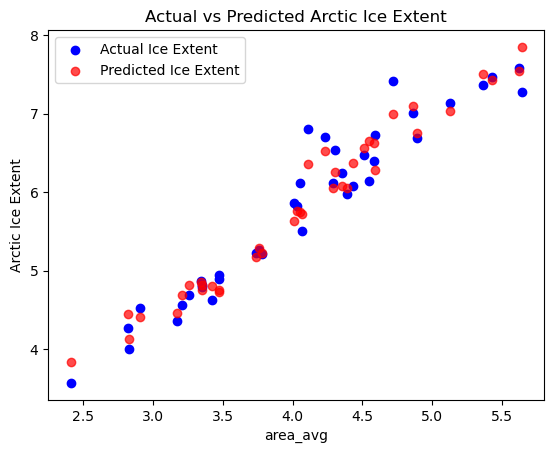

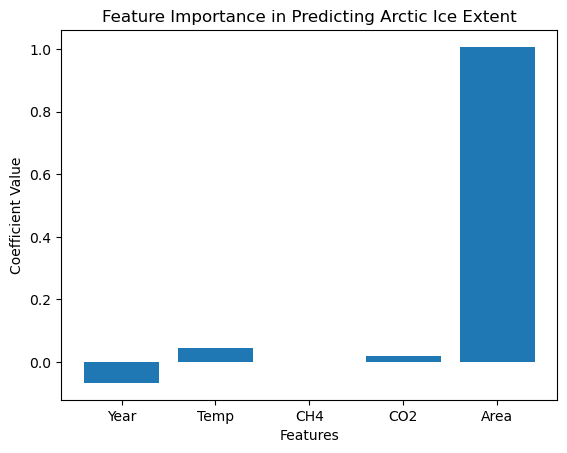

10
0.03310650500009674


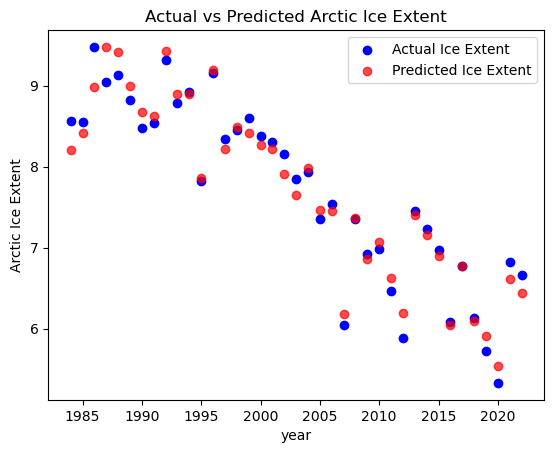

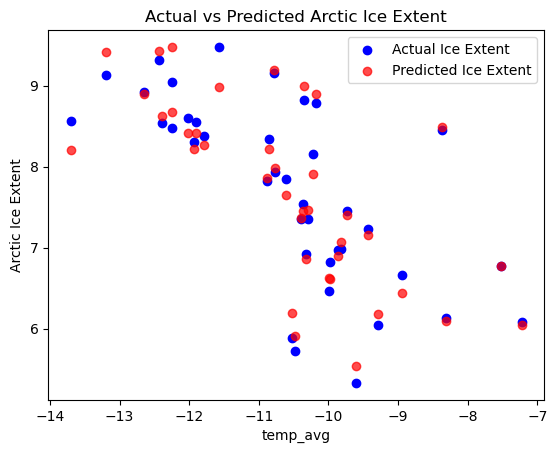

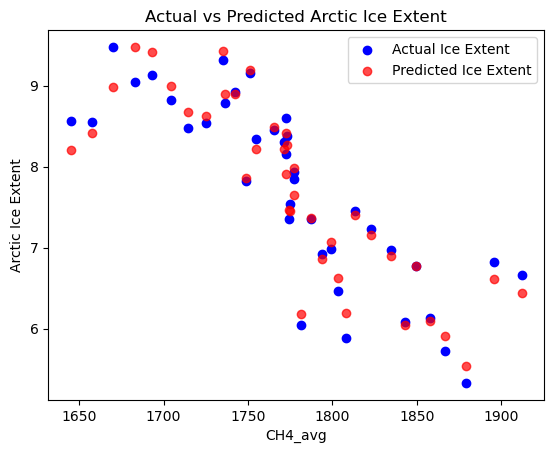

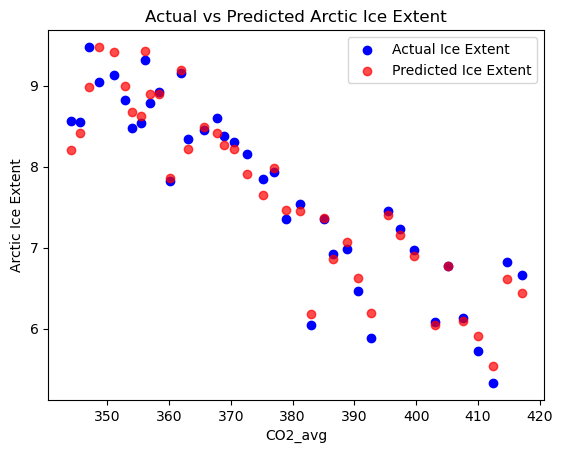

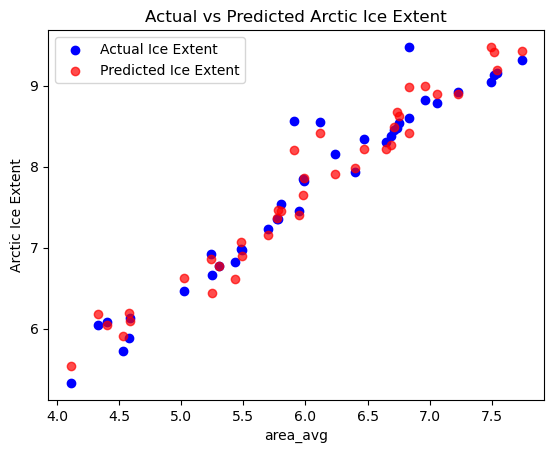

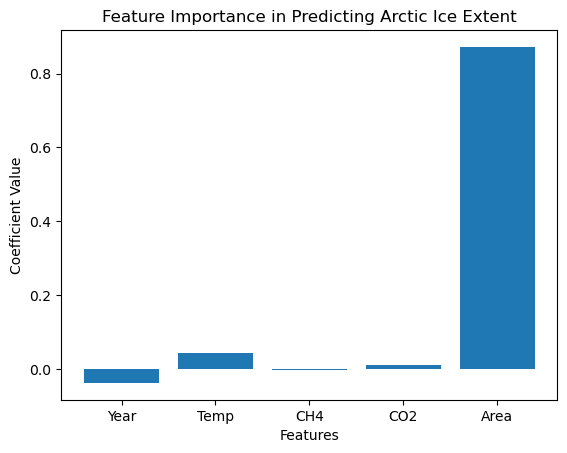

11
0.02306887311524455


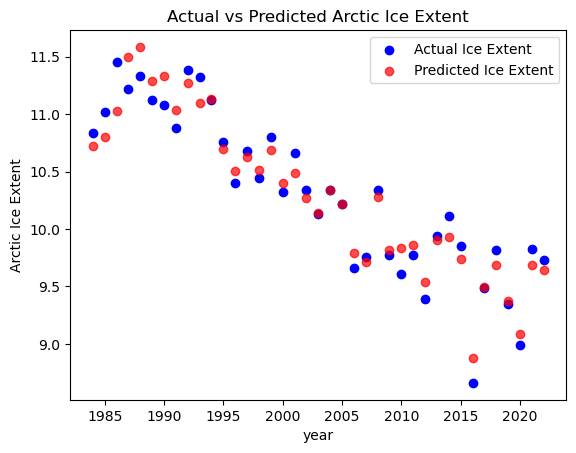

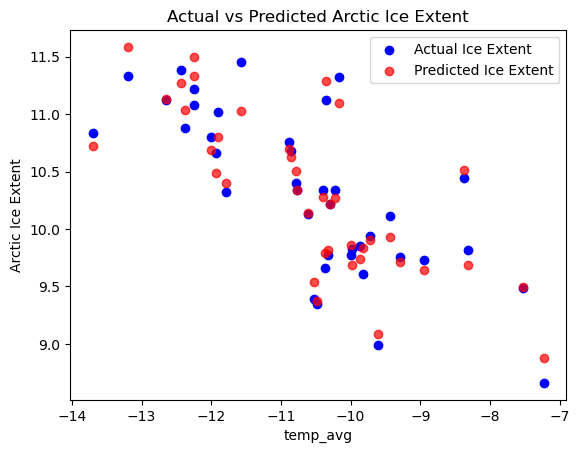

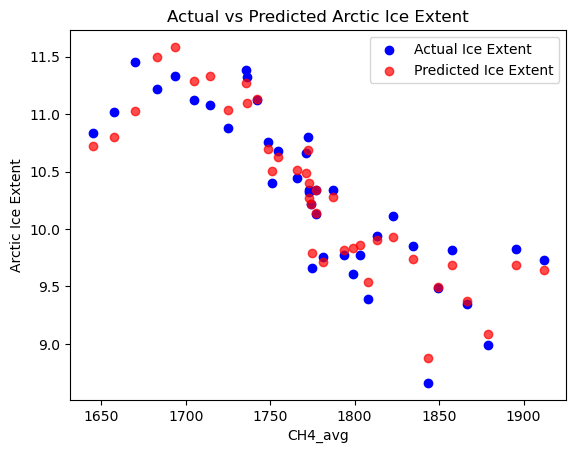

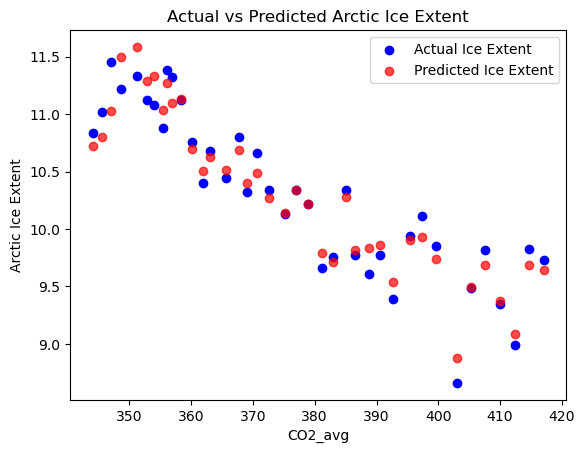

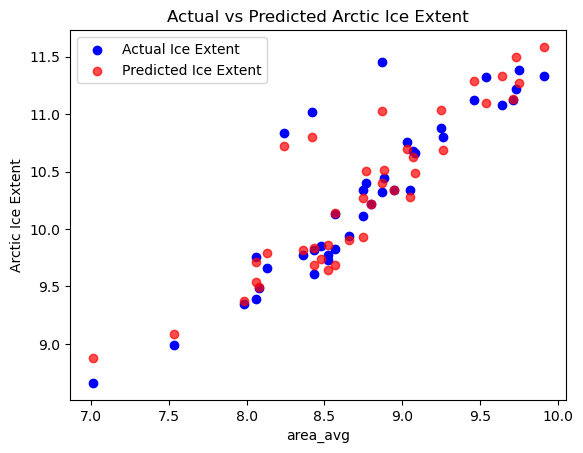

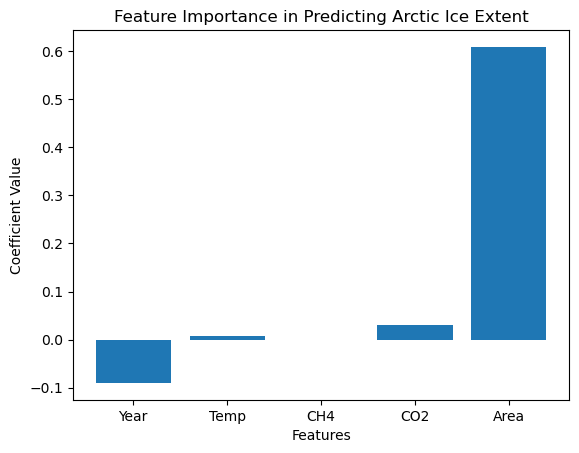

12
0.027842735597472783


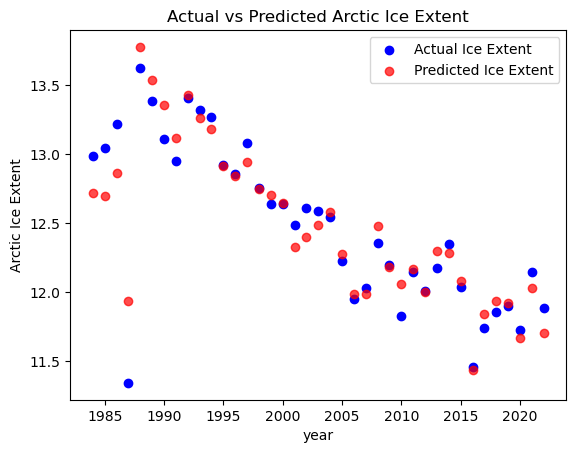

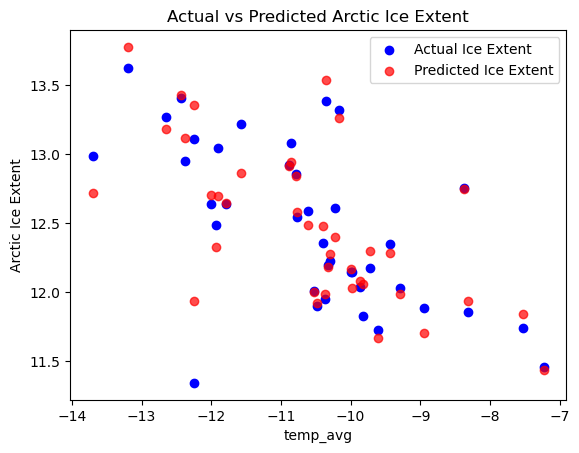

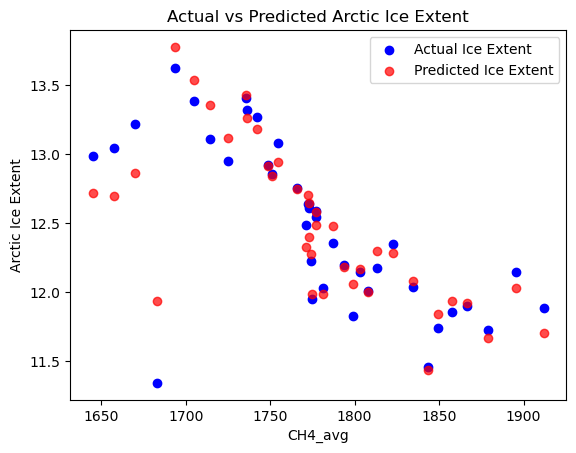

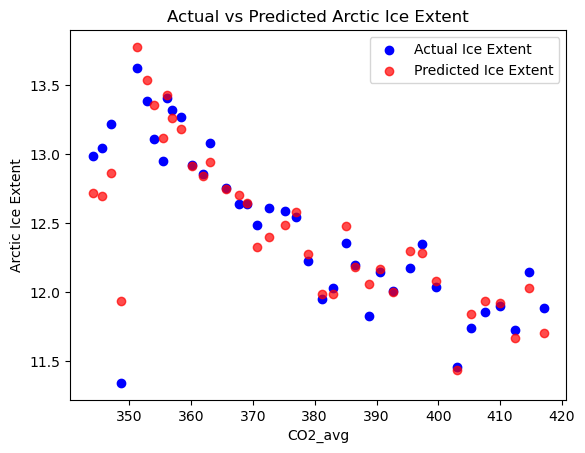

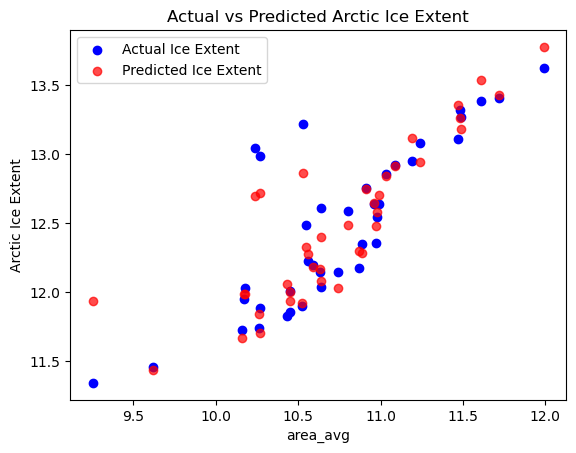

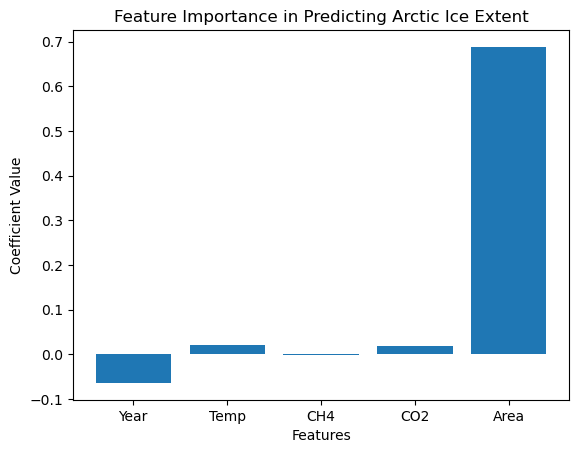

In [30]:
multivariate_monthly_list_plotter()

winter
MSE: 
year
feature MSE: 
0.07073126856474808


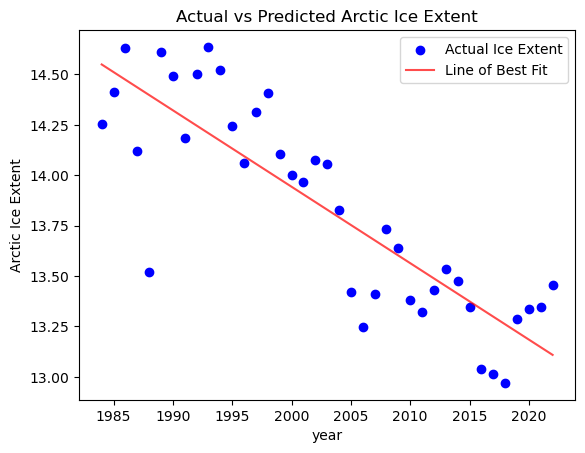

temp_avg
feature MSE: 
0.15965450474510406


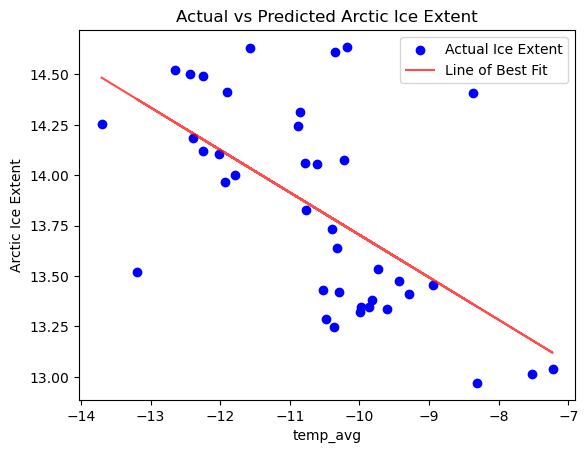

CH4_avg
feature MSE: 
0.10730536971753397


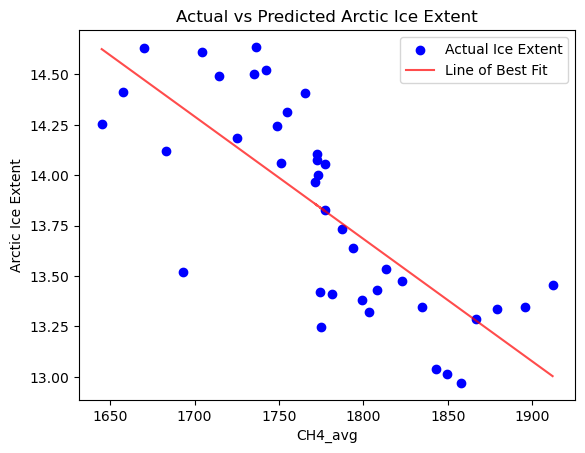

CO2_avg
feature MSE: 
0.06867220597123277


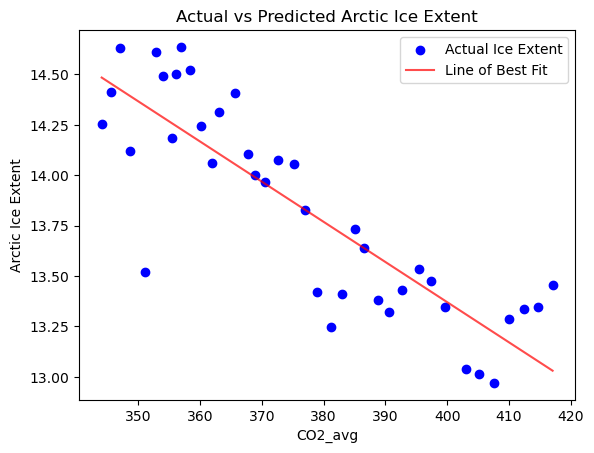

area_avg
feature MSE: 
0.13475083196638443


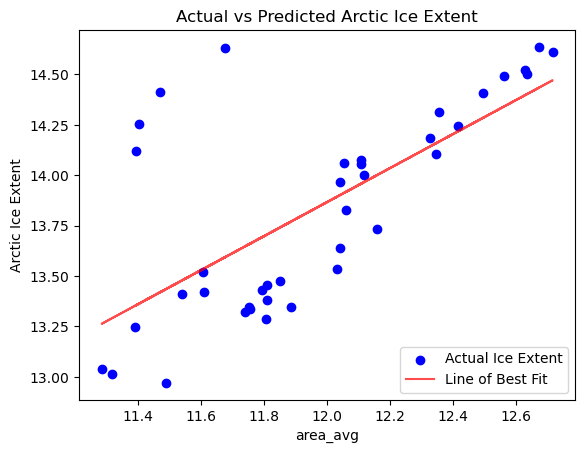

summer
MSE: 
year
feature MSE: 
0.10119710216808696


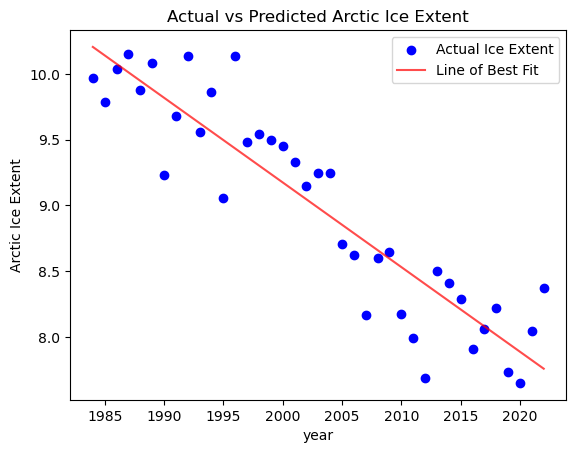

temp_avg
feature MSE: 
0.32762073324239604


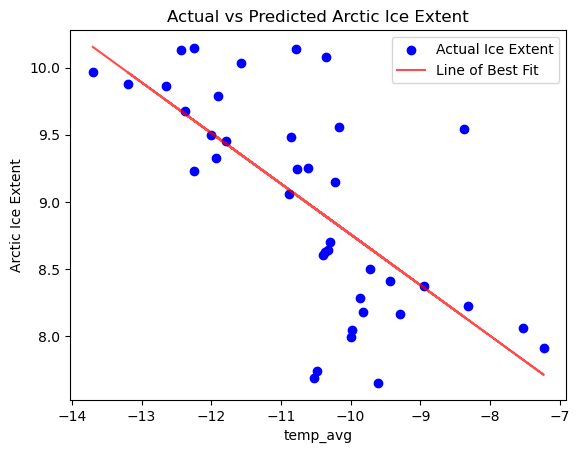

CH4_avg
feature MSE: 
0.18136454976506974


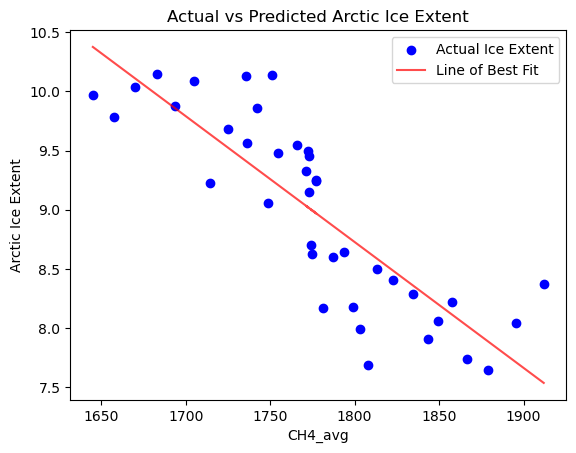

CO2_avg
feature MSE: 
0.10356949838862566


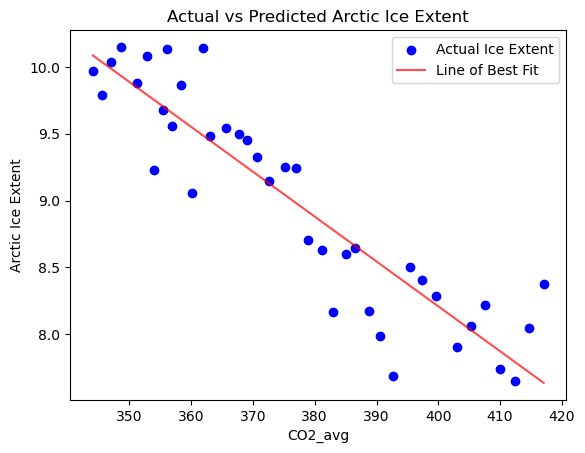

area_avg
feature MSE: 
0.09837592133124881


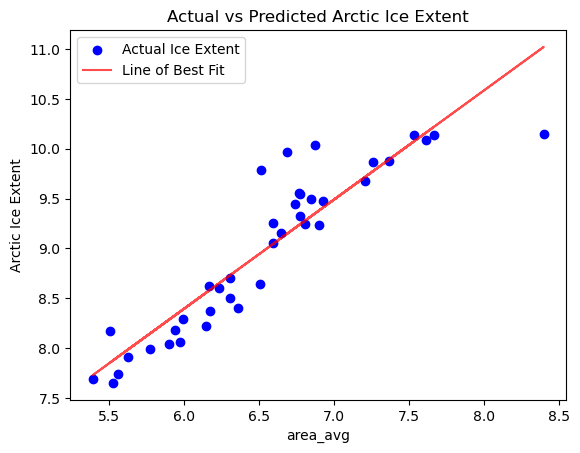

spring
MSE: 
year
feature MSE: 
0.05989299798916543


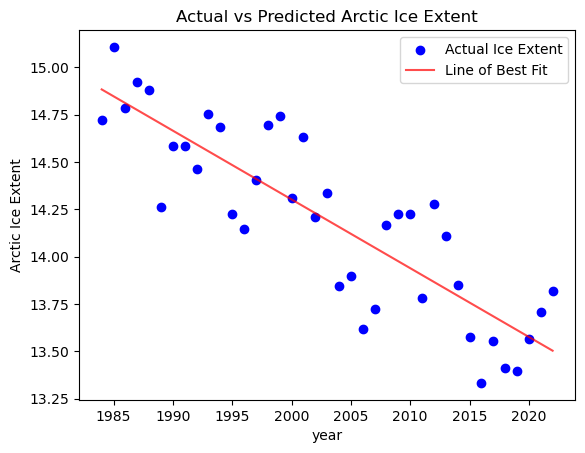

temp_avg
feature MSE: 
0.10590863029974812


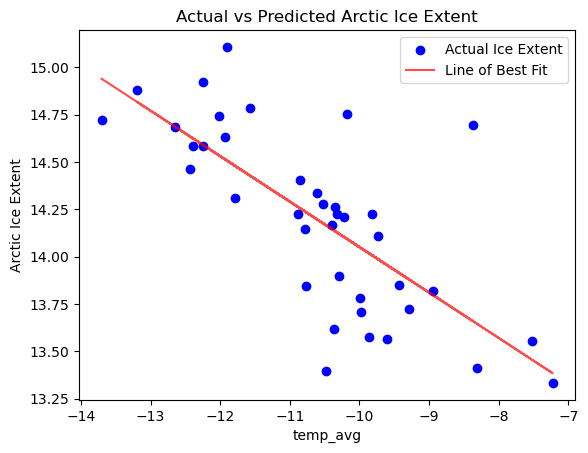

CH4_avg
feature MSE: 
0.07429697560547825


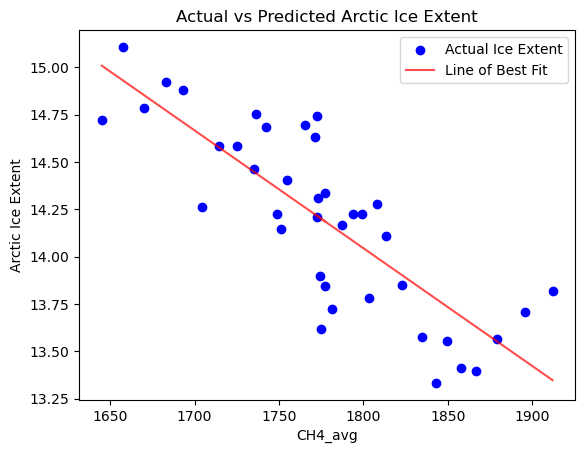

CO2_avg
feature MSE: 
0.059725363855583066


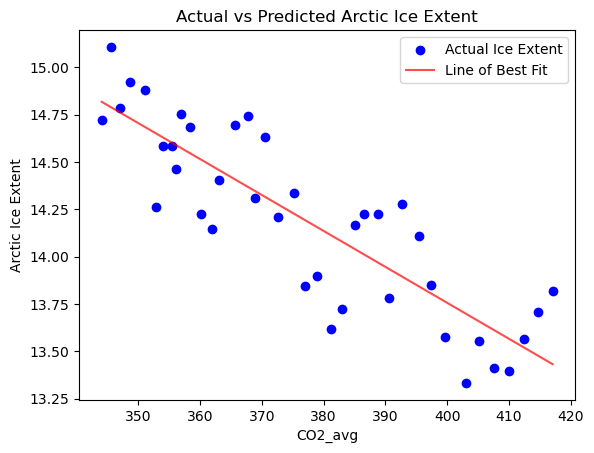

area_avg
feature MSE: 
0.1315710235237064


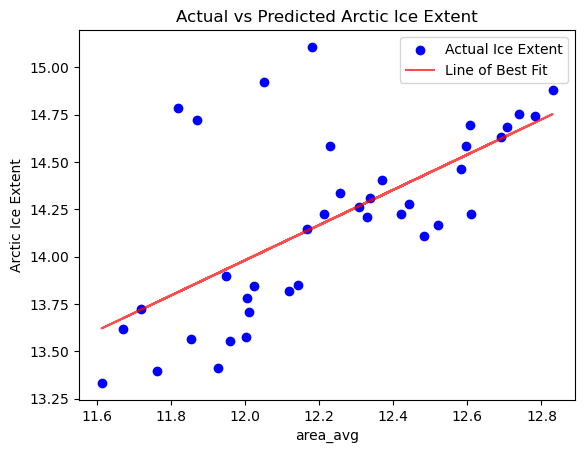

autumn
MSE: 
year
feature MSE: 
0.1613451139793372


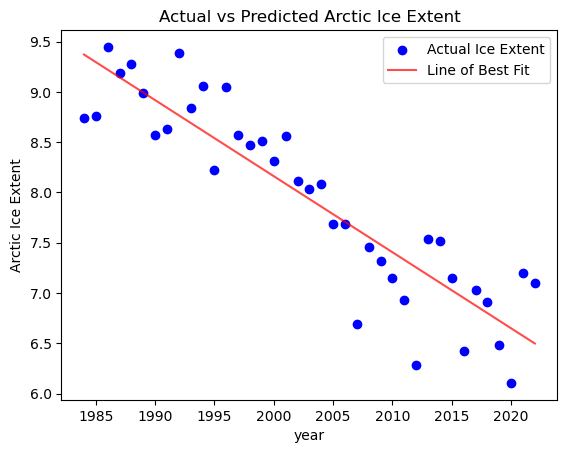

temp_avg
feature MSE: 
0.448352905483071


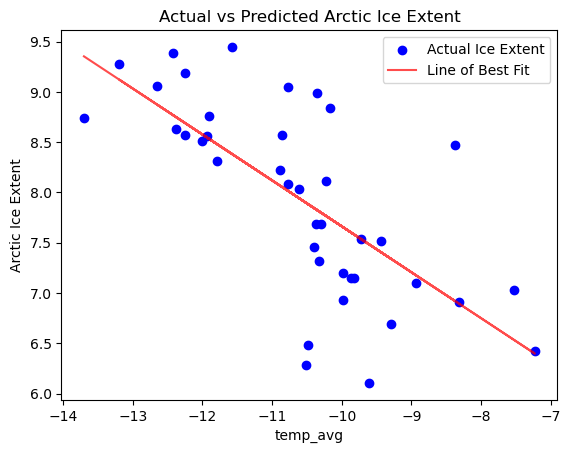

CH4_avg
feature MSE: 
0.27826317119989835


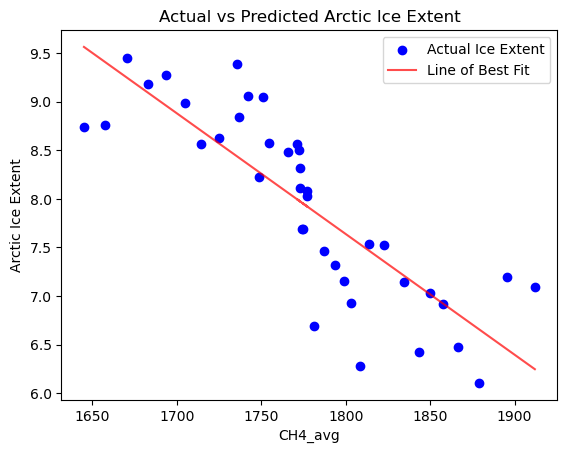

CO2_avg
feature MSE: 
0.16382333818933006


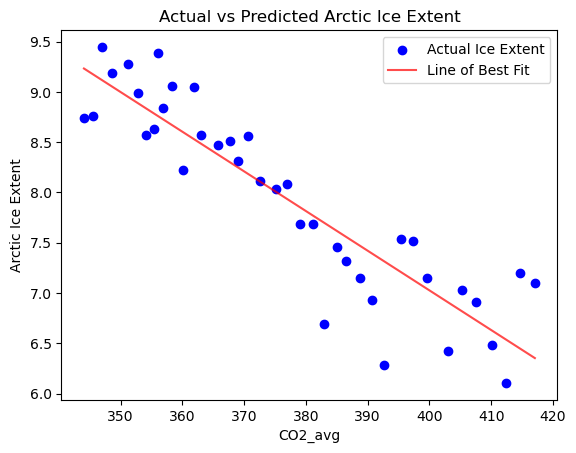

area_avg
feature MSE: 
0.08899265110106902


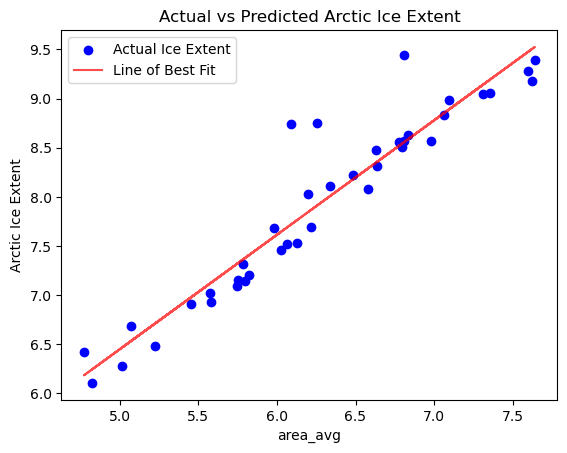

In [31]:
univariate_seasonal_list_plotter()

1
year
feature MSE: 
0.33242284925708937


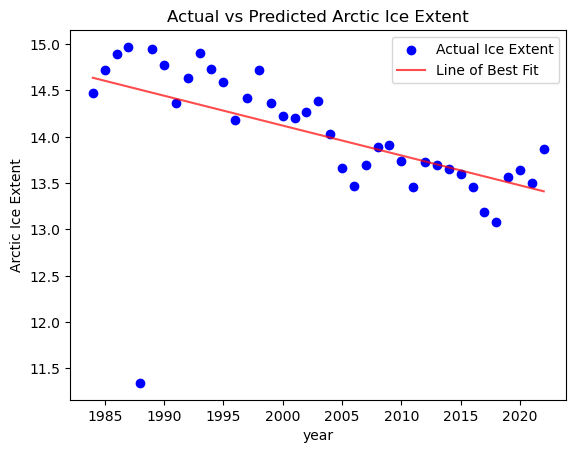

temp_avg
feature MSE: 
0.42527733103019644


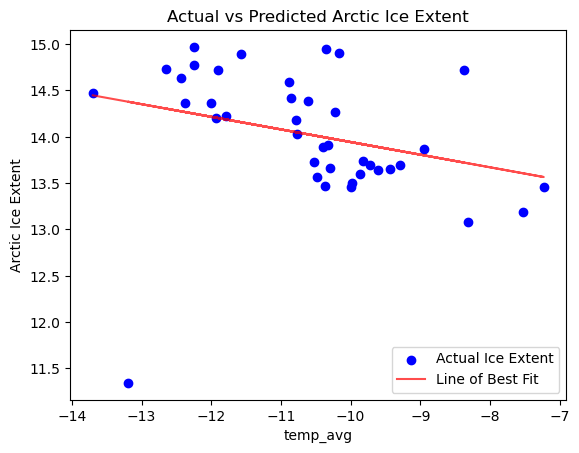

CH4_avg
feature MSE: 
0.3625271761901273


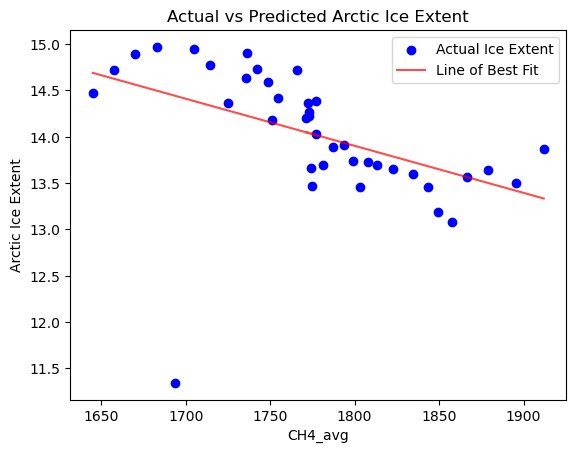

CO2_avg
feature MSE: 
0.3268907770547222


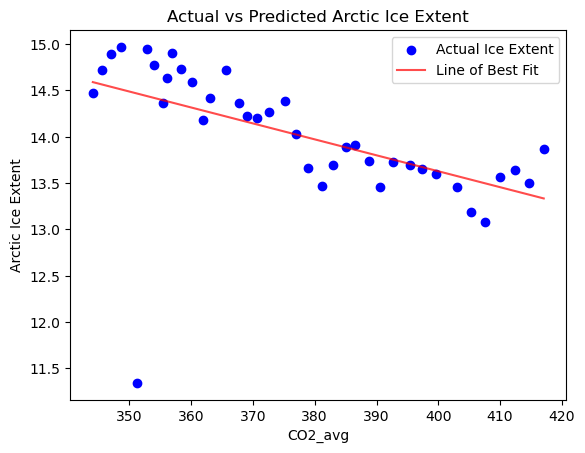

area_avg
feature MSE: 
0.16452182001635832


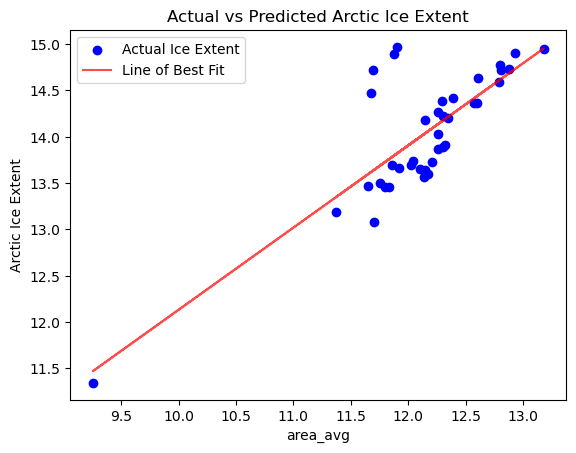

2
year
feature MSE: 
0.06887036454548588


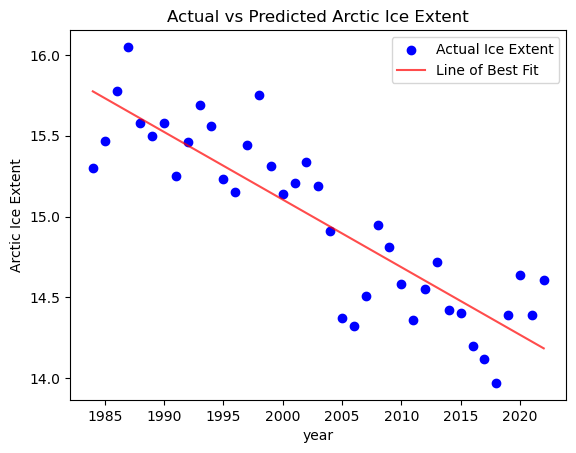

temp_avg
feature MSE: 
0.16332875130581864


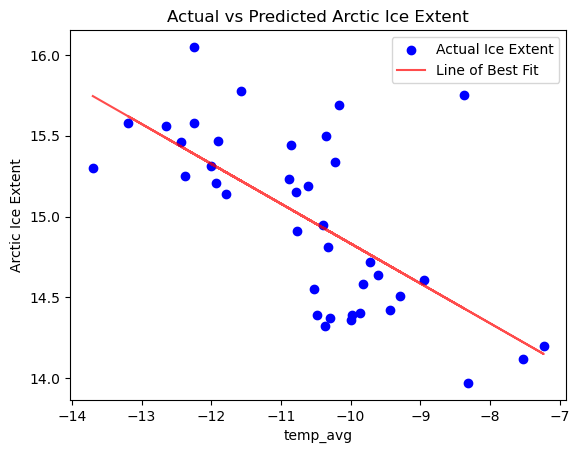

CH4_avg
feature MSE: 
0.1095911780016074


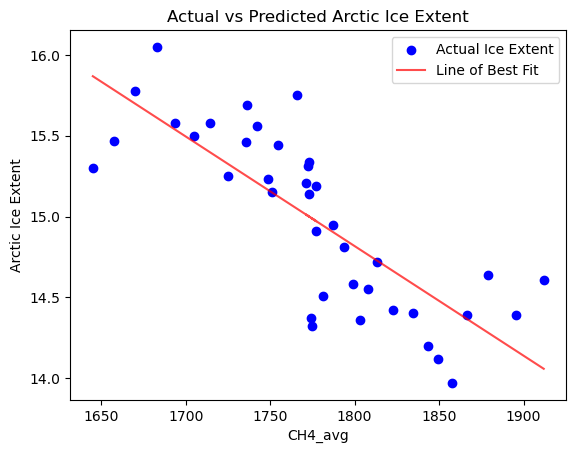

CO2_avg
feature MSE: 
0.07014610465326959


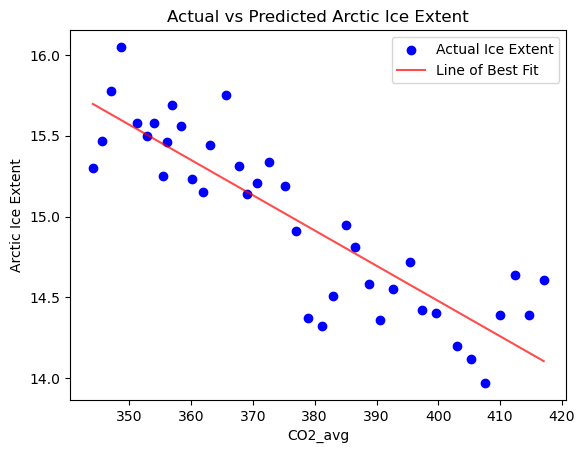

area_avg
feature MSE: 
0.15805900396968992


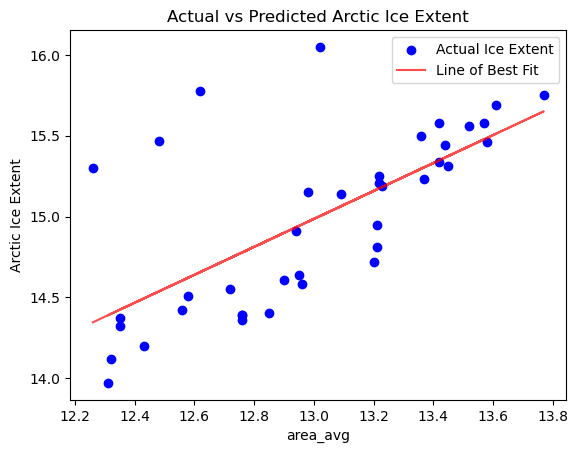

3
year
feature MSE: 
0.0637745951417007


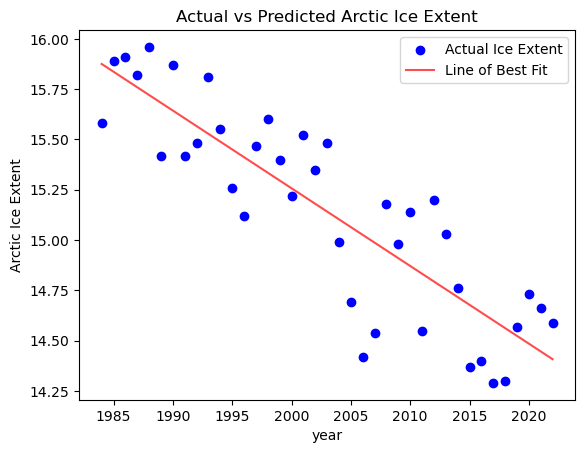

temp_avg
feature MSE: 
0.12197806974509415


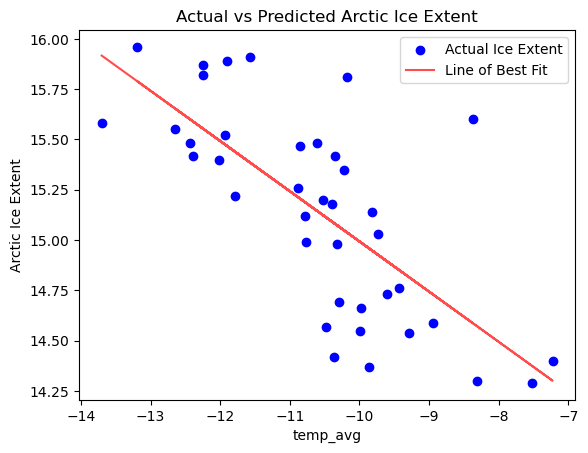

CH4_avg
feature MSE: 
0.08503649958699813


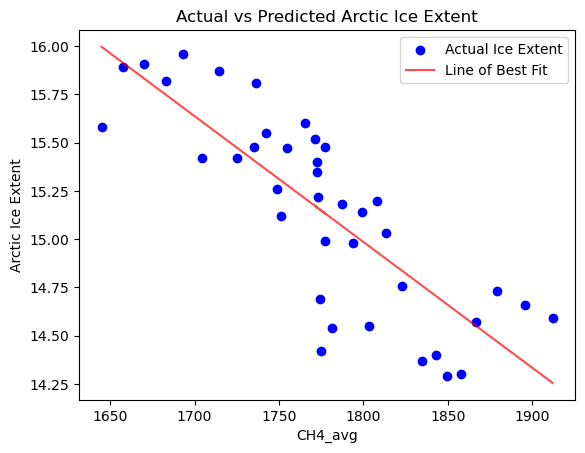

CO2_avg
feature MSE: 
0.06545393384097313


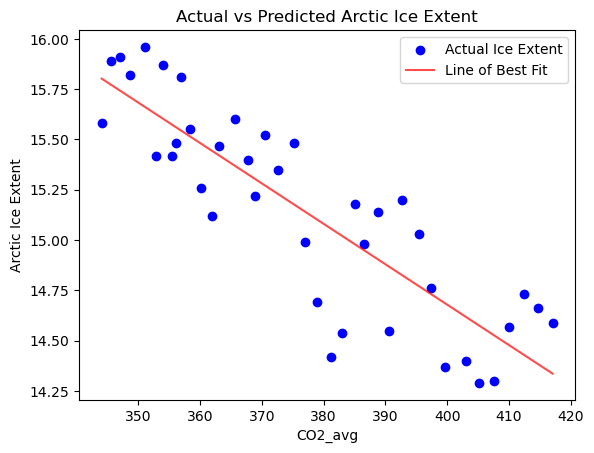

area_avg
feature MSE: 
0.16395945650443836


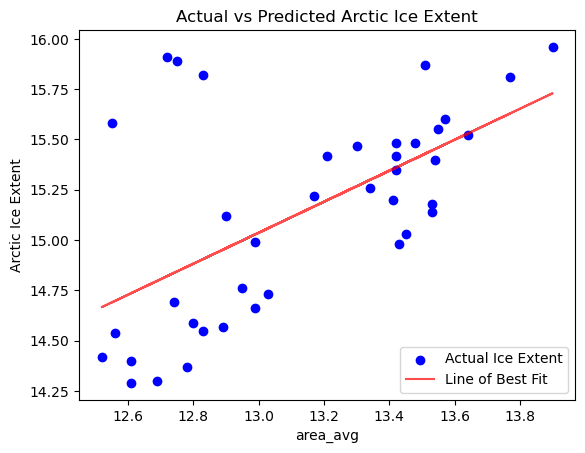

4
year
feature MSE: 
0.08111094639952879


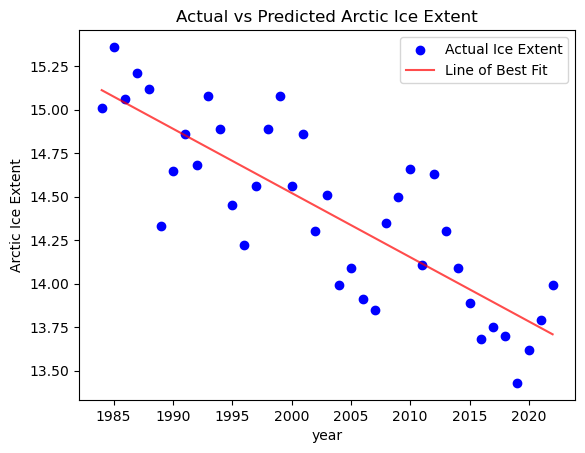

temp_avg
feature MSE: 
0.13072835842635883


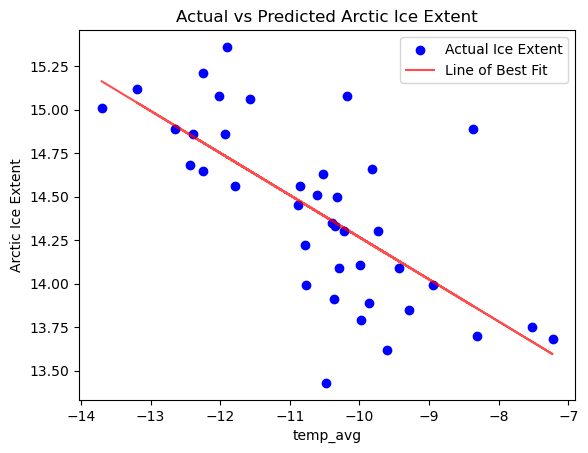

CH4_avg
feature MSE: 
0.0897231477849212


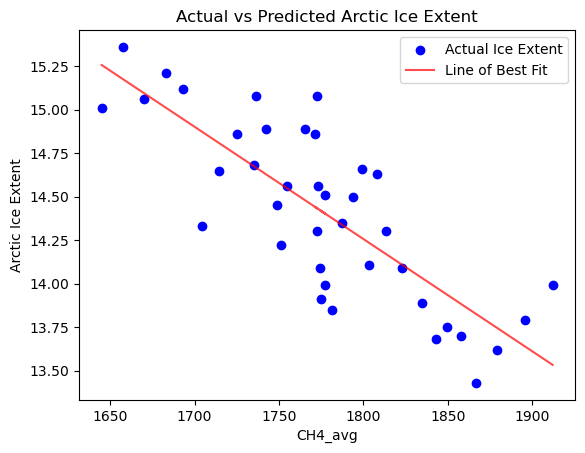

CO2_avg
feature MSE: 
0.07958744083278518


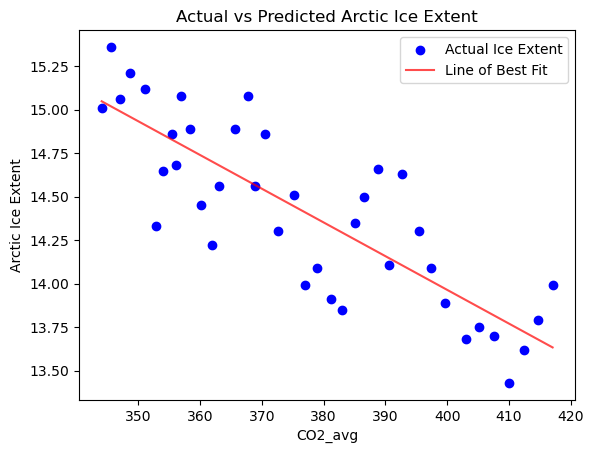

area_avg
feature MSE: 
0.14587434854340553


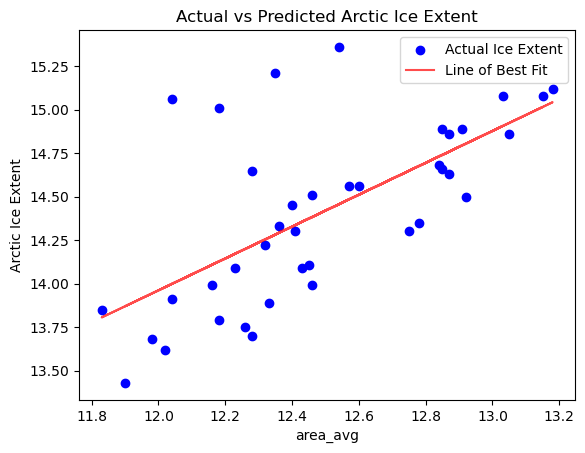

5
year
feature MSE: 
0.08104842330184472


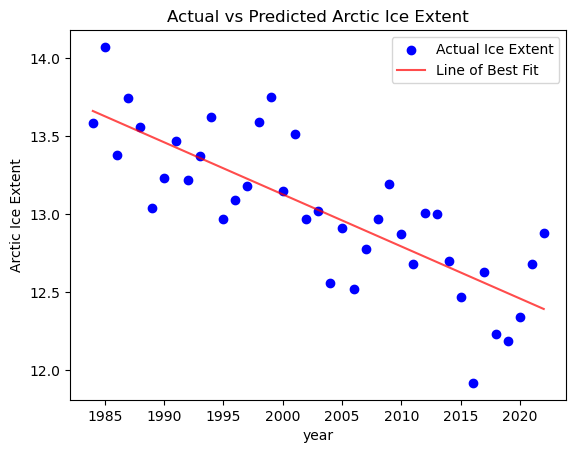

temp_avg
feature MSE: 
0.11261452726727207


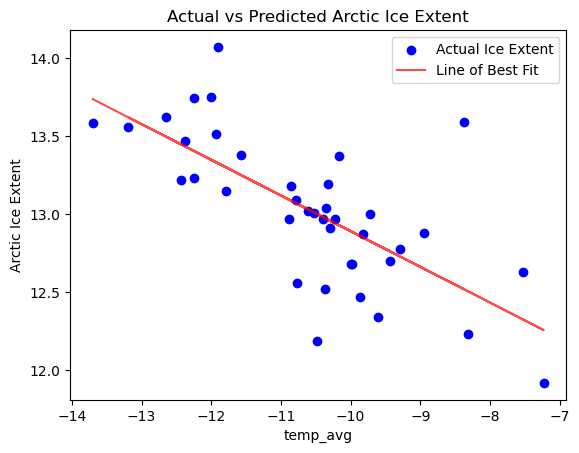

CH4_avg
feature MSE: 
0.09452320155639955


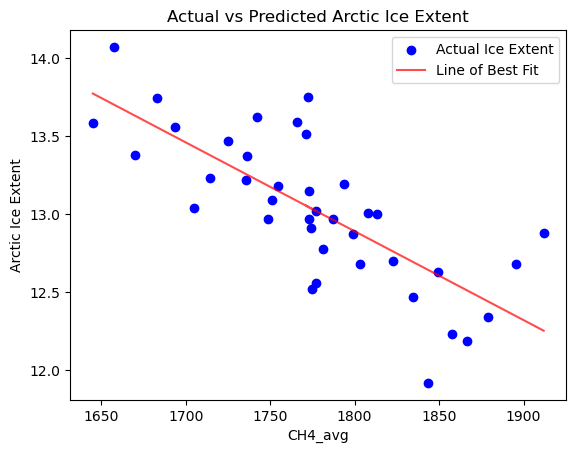

CO2_avg
feature MSE: 
0.08050593831993284


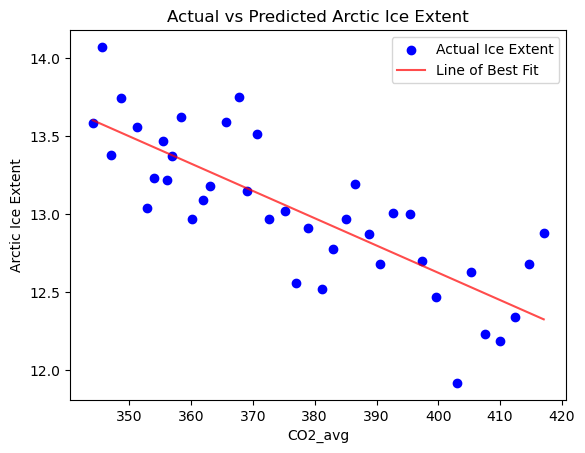

area_avg
feature MSE: 
0.10478696269114998


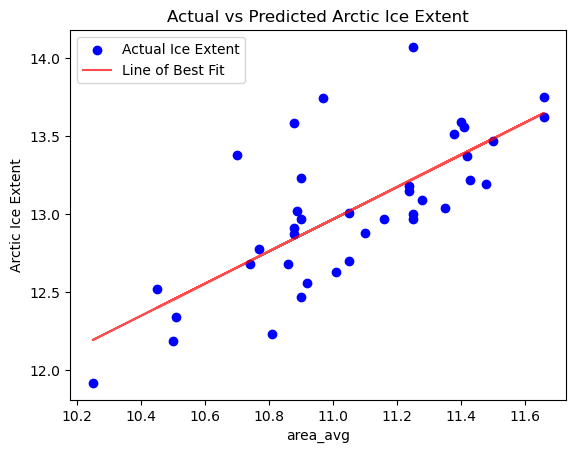

6
year
feature MSE: 
0.05075815028201648


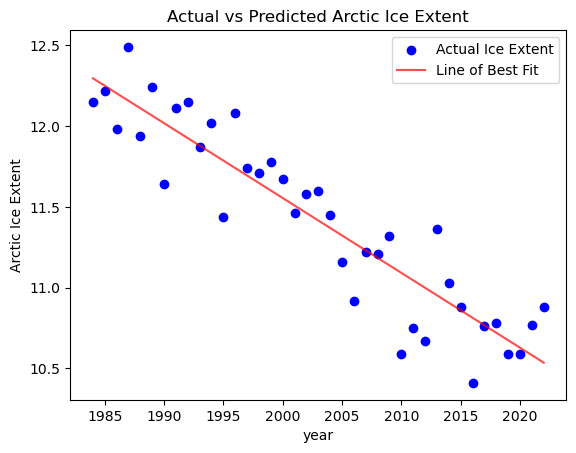

temp_avg
feature MSE: 
0.16023134361521138


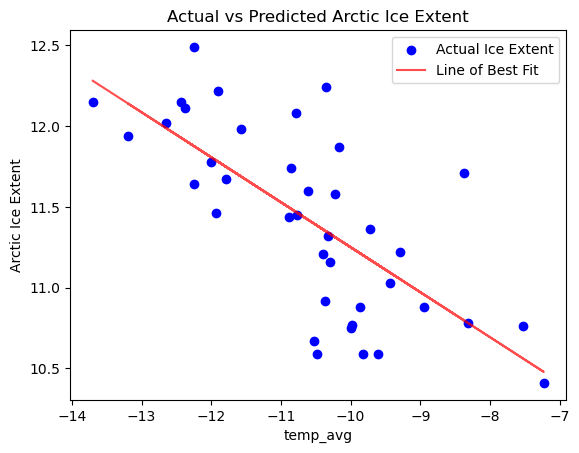

CH4_avg
feature MSE: 
0.08456324145821184


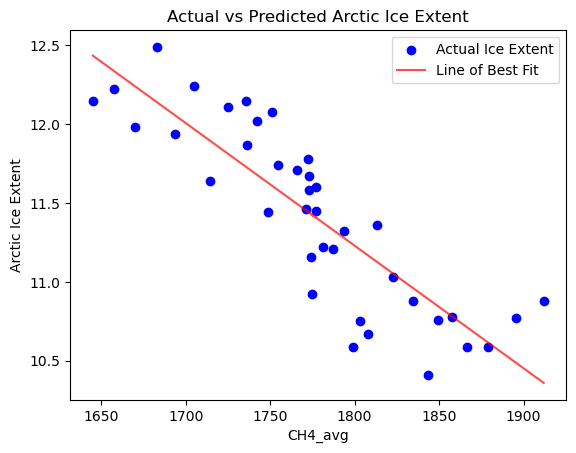

CO2_avg
feature MSE: 
0.053844074425112985


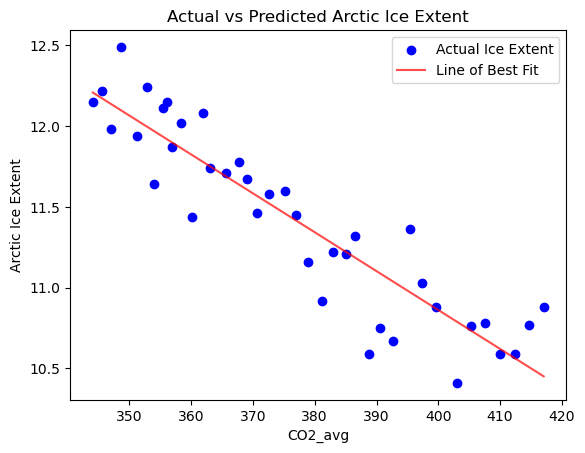

area_avg
feature MSE: 
0.08396643978604268


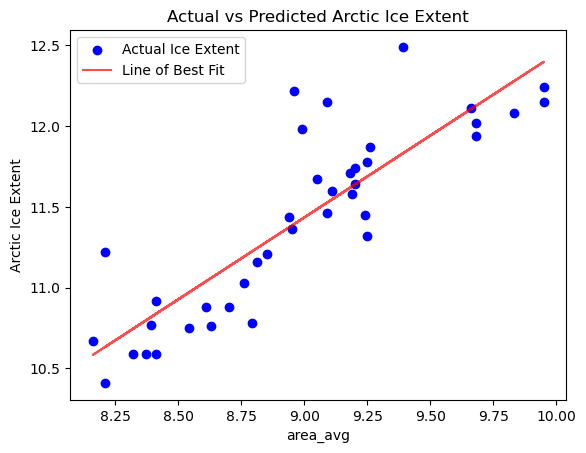

7
year
feature MSE: 
0.13960194556904934


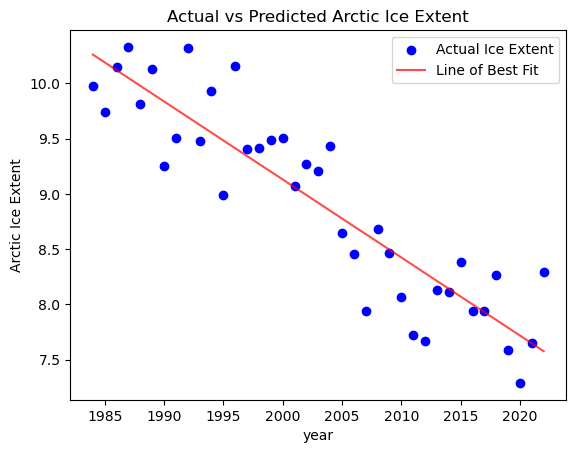

temp_avg
feature MSE: 
0.42191690693797157


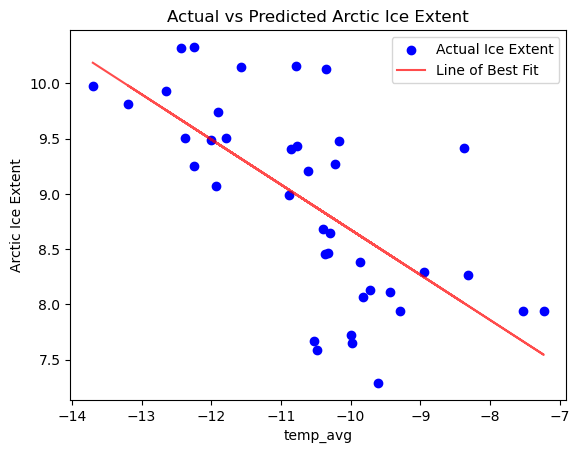

CH4_avg
feature MSE: 
0.2323723676609351


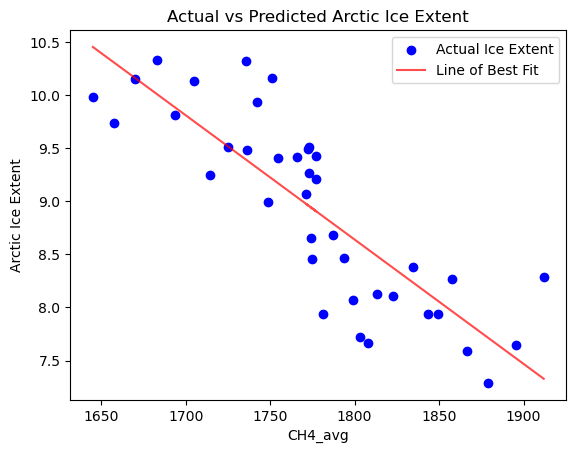

CO2_avg
feature MSE: 
0.14176339521372705


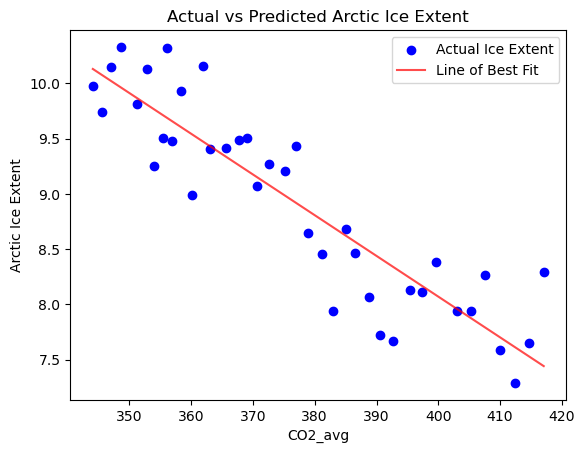

area_avg
feature MSE: 
0.1288516673672163


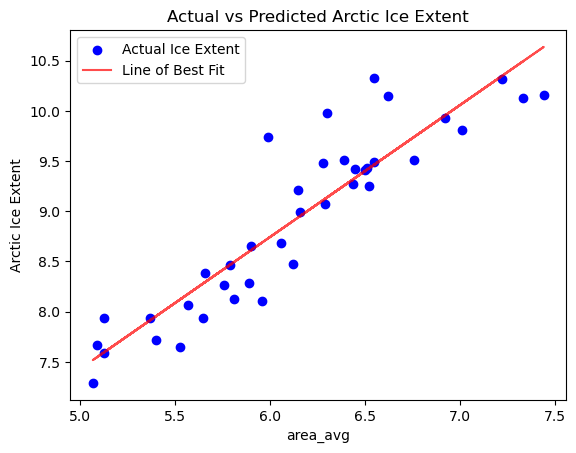

8
year
feature MSE: 
0.2085109297899593


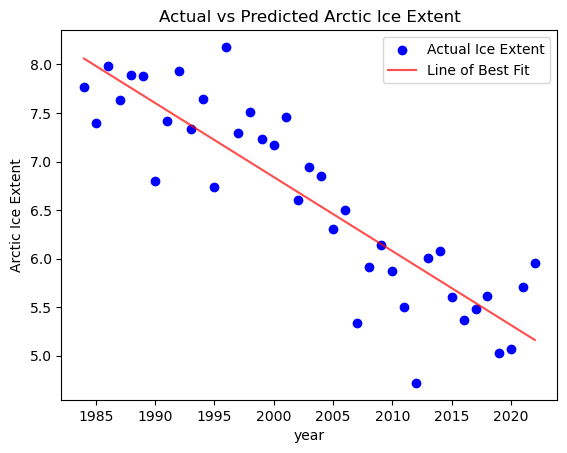

temp_avg
feature MSE: 
0.5275442077210335


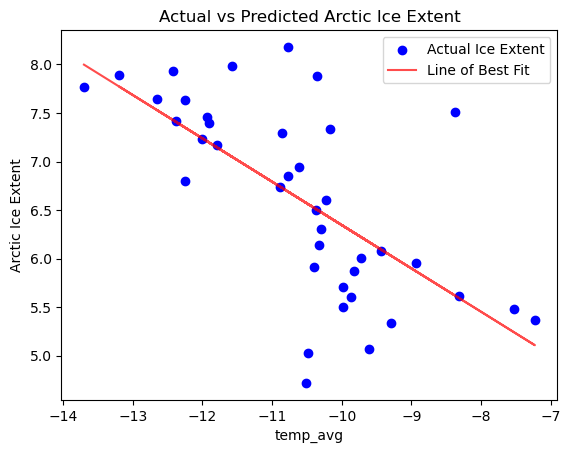

CH4_avg
feature MSE: 
0.33724880259365503


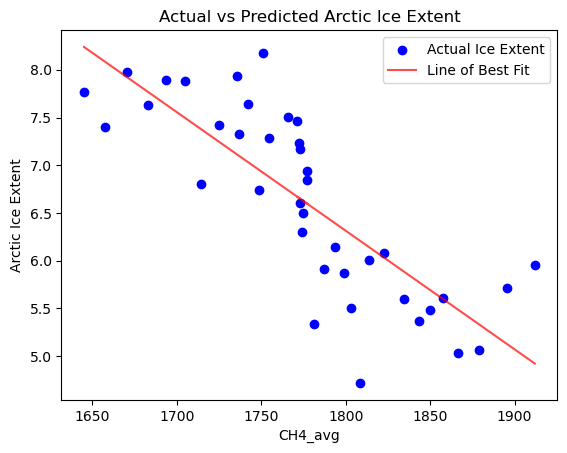

CO2_avg
feature MSE: 
0.20951760740322362


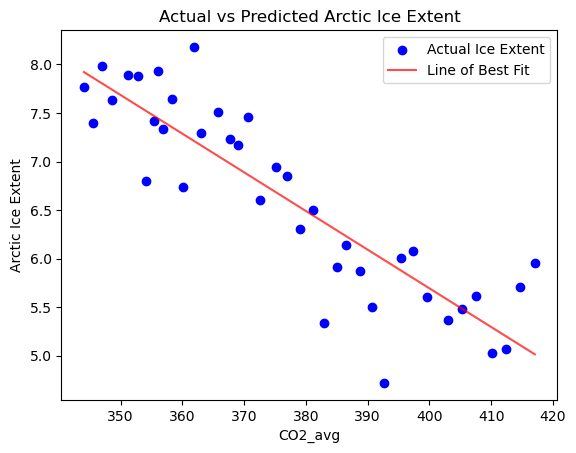

area_avg
feature MSE: 
0.3865712540364868


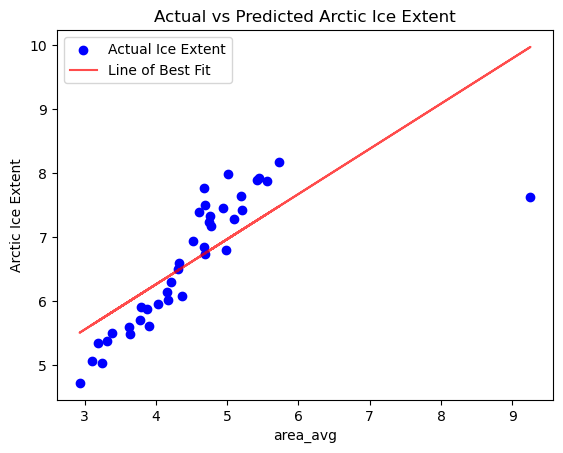

9
year
feature MSE: 
0.28629445257621366


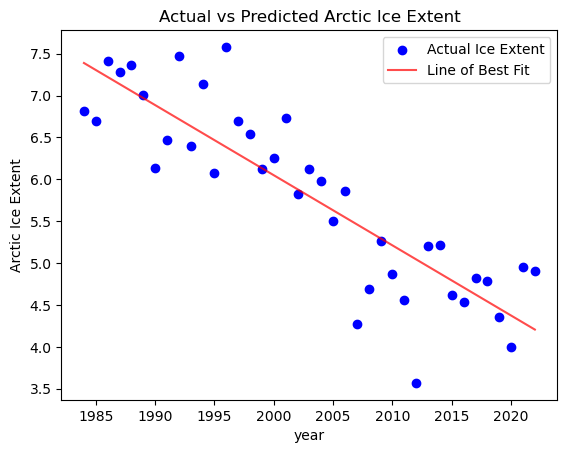

temp_avg
feature MSE: 
0.6627145150982084


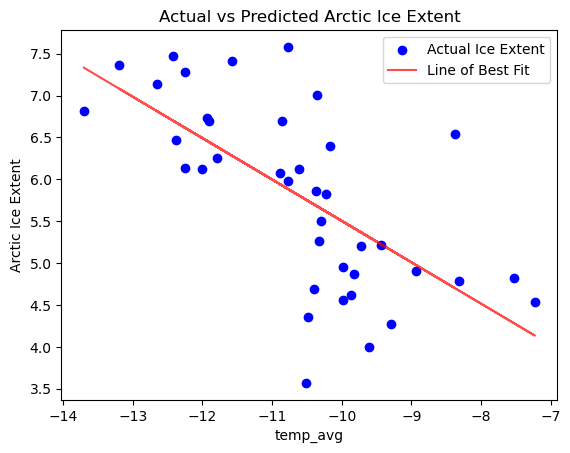

CH4_avg
feature MSE: 
0.44233151255657976


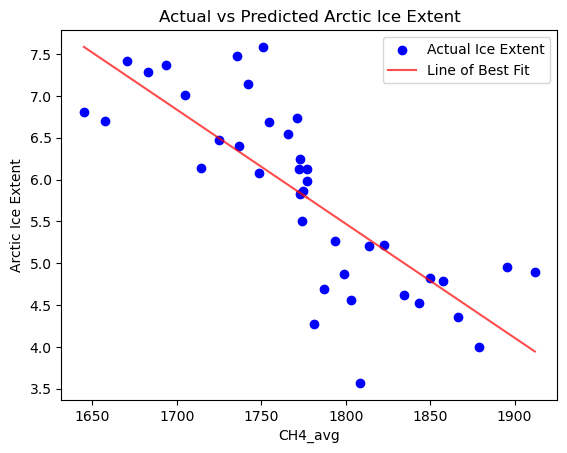

CO2_avg
feature MSE: 
0.29369593755636686


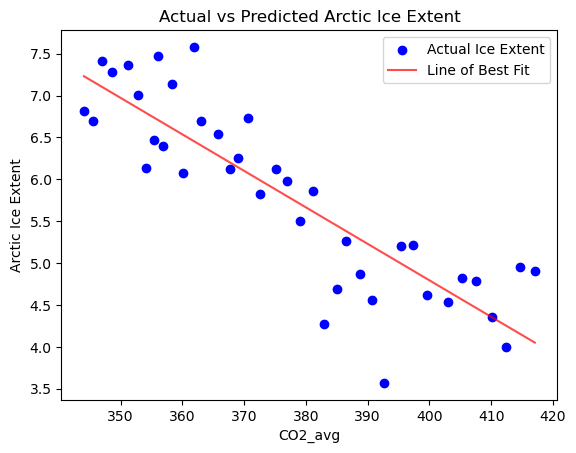

area_avg
feature MSE: 
0.09098348773233061


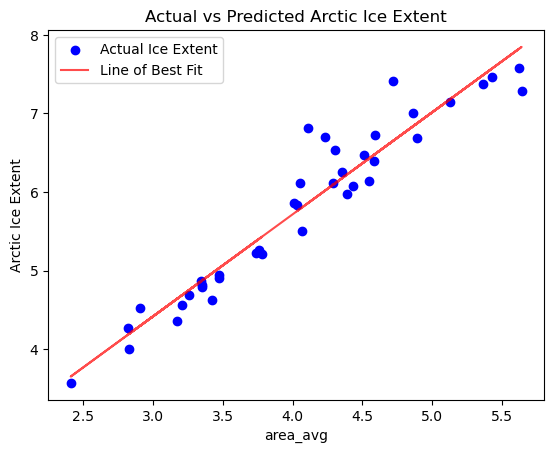

10
year
feature MSE: 
0.26835007232083863


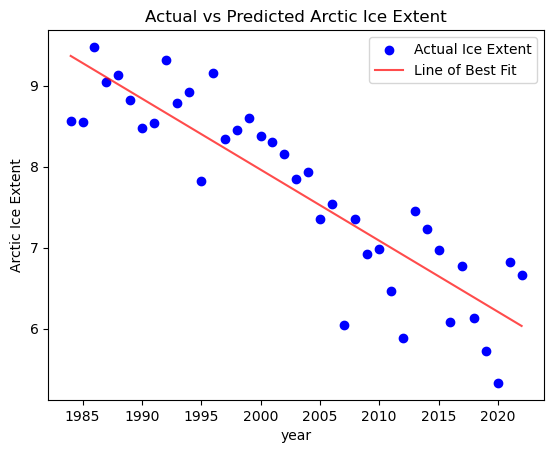

temp_avg
feature MSE: 
0.6742748230554942


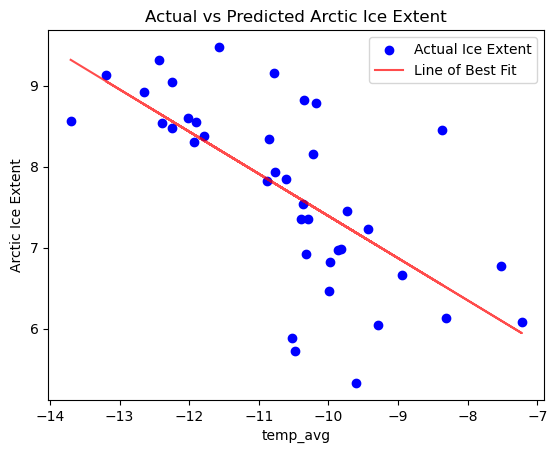

CH4_avg
feature MSE: 
0.42149850211443396


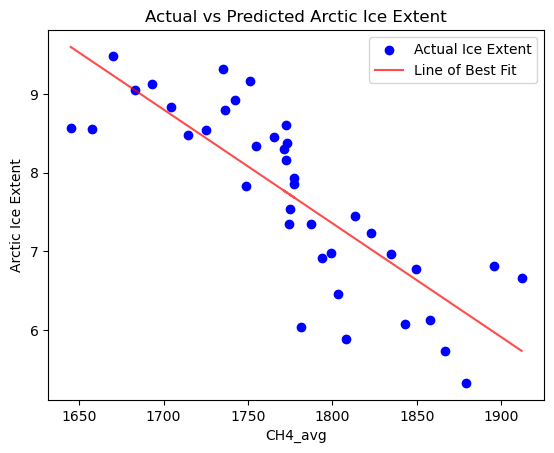

CO2_avg
feature MSE: 
0.25976994594624186


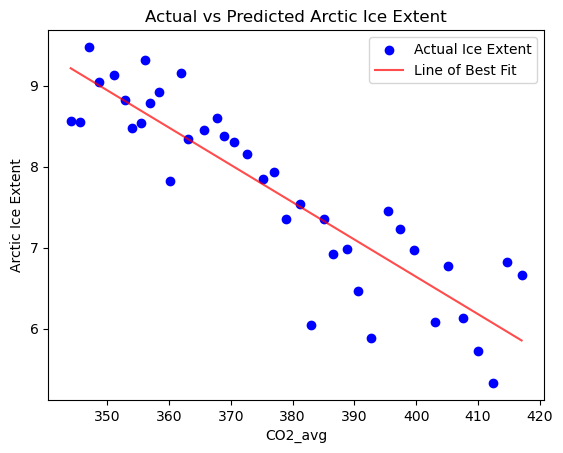

area_avg
feature MSE: 
0.08393635518585676


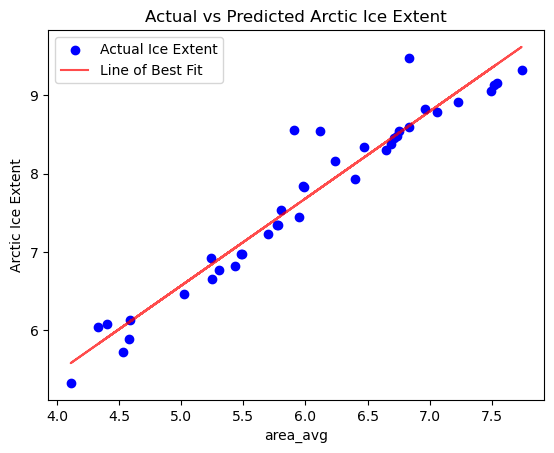

11
year
feature MSE: 
0.09988292968614843


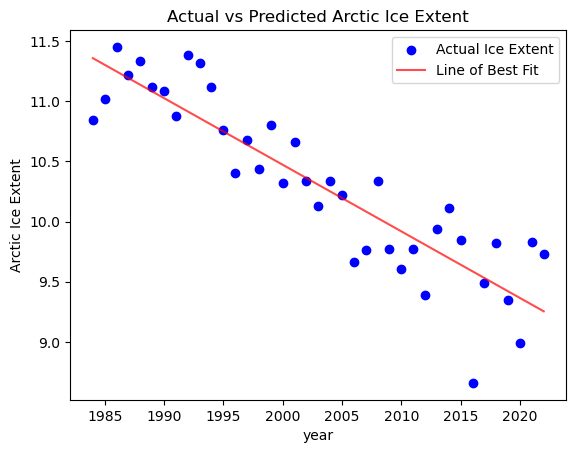

temp_avg
feature MSE: 
0.22416822533464859


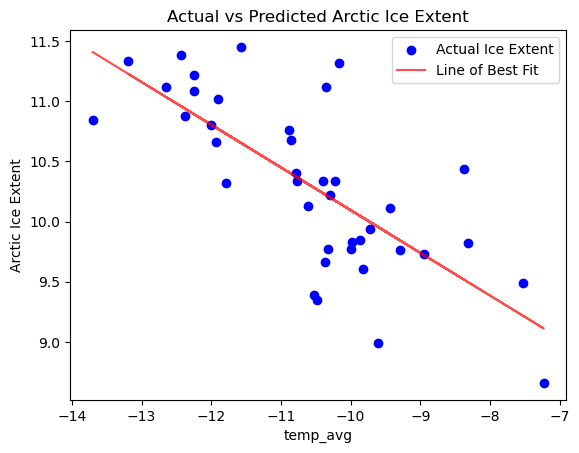

CH4_avg
feature MSE: 
0.1568380733692808


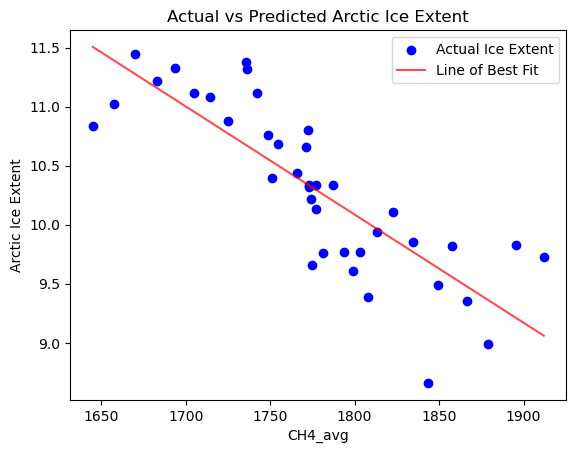

CO2_avg
feature MSE: 
0.10580067464747336


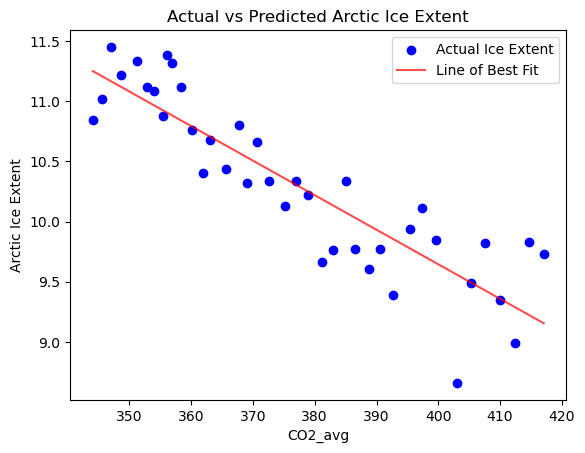

area_avg
feature MSE: 
0.11056517958130531


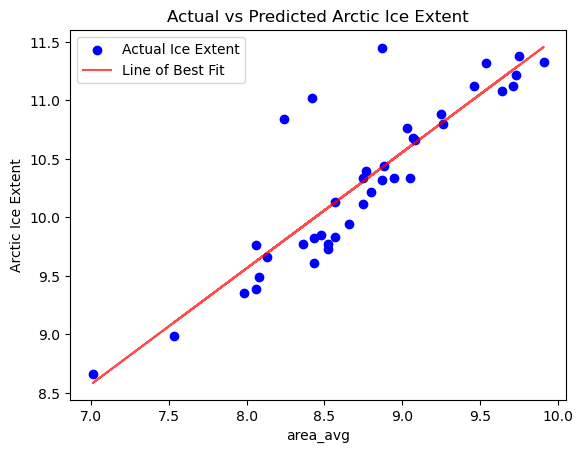

12
year
feature MSE: 
0.14140481916953845


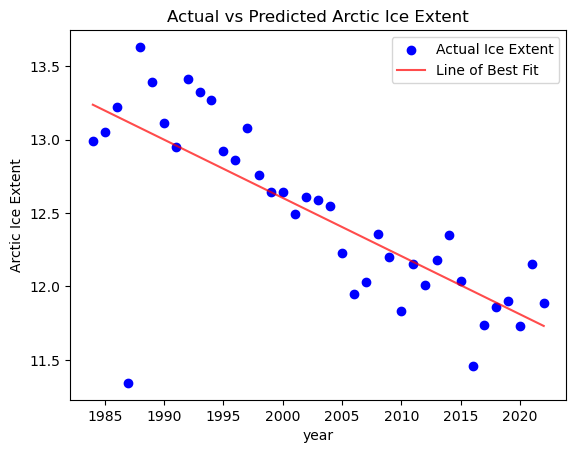

temp_avg
feature MSE: 
0.2097817195713808


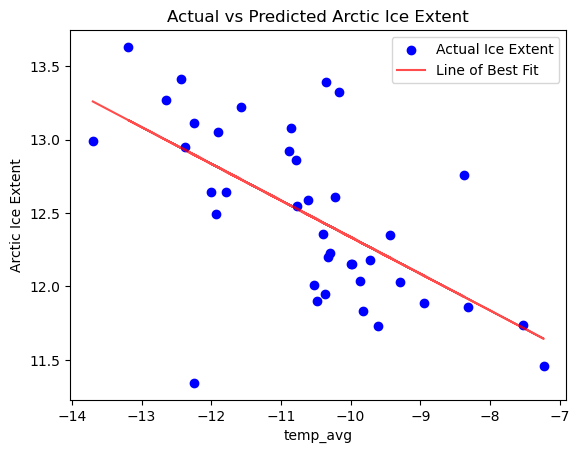

CH4_avg
feature MSE: 
0.18048978240111305


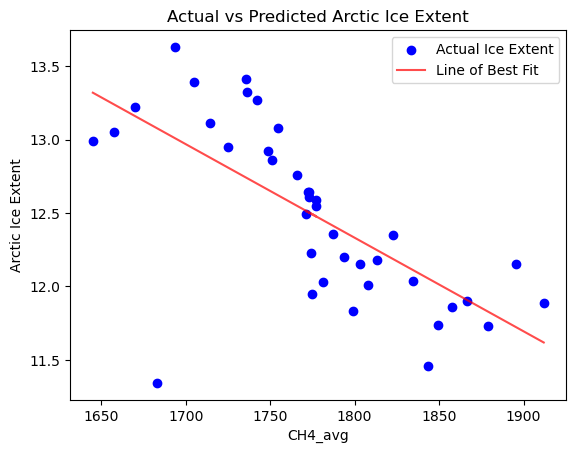

CO2_avg
feature MSE: 
0.1404836843650152


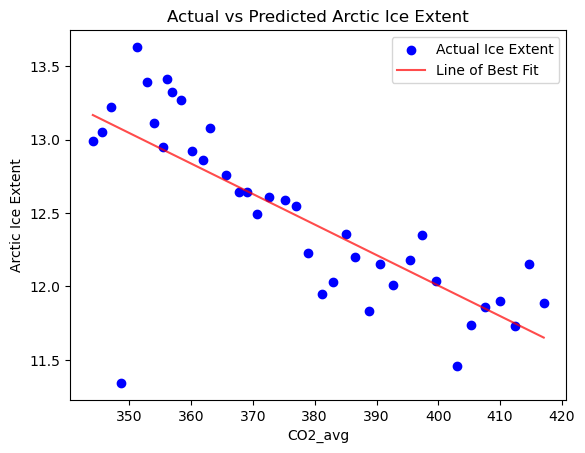

area_avg
feature MSE: 
0.11155852493030209


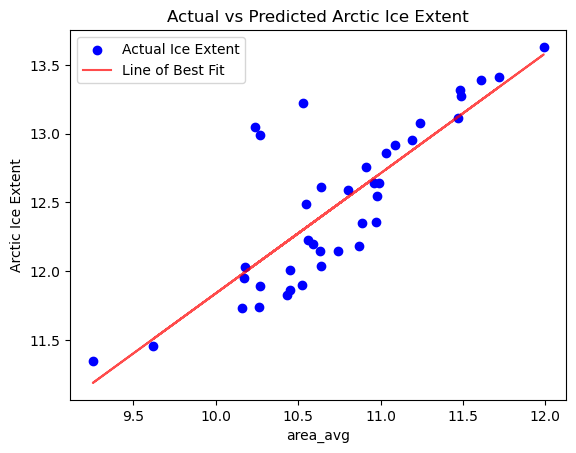

In [32]:
univariate_monthly_list_plotter()